In [305]:
import pandas as pd
import requests
import driver
from selenium import webdriver
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


### Afghanistan

In [85]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Afghanistan_national_cricket_team')

Afghanistan_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[2]')

Afghanistan_table_html = Afghanistan_squad_table.get_attribute('outerHTML')

driver.quit()

Afghanistan_df_list = pd.read_html(Afghanistan_table_html)

if Afghanistan_df_list:
    Afghanistan_squad = Afghanistan_df_list[0]
    print(Afghanistan_squad)
else:
    print("No tables found in the HTML content.")

                    Name             Age   Batting style  \
                 Batters         Batters         Batters   
0            Abdul Malik              25    Right-handed   
1             Bahir Shah              23    Right-handed   
2   Hashmatullah Shahidi              29     Left-handed   
3      Hazratullah Zazai              25     Left-handed   
4         Ibrahim Zadran              21    Right-handed   
5      Najibullah Zadran              30     Left-handed   
6            Nasir Jamal              29    Right-handed   
7            Riaz Hassan              21    Right-handed   
8        Sediqullah Atal              22     Left-handed   
9            Usman Ghani              27    Right-handed   
10          All-rounders    All-rounders    All-rounders   
11         Zia-ur-Rehman              25    Right-handed   
12            Amir Hamza              32    Right-handed   
13    Azmatullah Omarzai              23    Right-handed   
14         Gulbadin Naib              32

In [201]:
Afghanistan_squad['Role'] = 'Other'  # Default role

# Assign the role 'Batters' to the first 10 rows
Afghanistan_squad.loc[:9, 'Role'] = 'Batters'

# Assign the role 'All-Rounders' to the next 9 rows
Afghanistan_squad.loc[10:19, 'Role'] = 'All-Rounders'

# Assign the role 'Wicket Keeper' to the next 3 rows
Afghanistan_squad.loc[20:23, 'Role'] = 'Wicket Keeper'

# Assign the role 'Spin Bowler' to the next 4 rows
Afghanistan_squad.loc[24:27, 'Role'] = 'Spin Bowler'

# Assign the role 'Pace Bowler' to the last rows
Afghanistan_squad.loc[28:, 'Role'] = 'Pace Bowler'

# Display the resulting DataFrame
Afghanistan_squad.head(50)





,Name,Age,Batting style,Bowling style,Region,Franchise,Forms,S/N,C,Captain,Last Test,Last ODI,Last T20I,Role,Country
0,Abdul Malik,25,Right-handed,—,Amo,Boost Defenders,Test,NaN,NaN,NaN,2023,—,—,Batters,Afghanistan
1,Bahir Shah,23,Right-handed,—,Speen Ghar,Amo Sharks,Test,NaN,NaN,NaN,2023,—,—,Batters,Afghanistan
2,Hashmatullah Shahidi,29,Left-handed,Right-arm off break,Band-e-Amir,Boost Defenders,"Test, ODI",50,NaN,"Test, ODI (C)",2023,2023,2022,Batters,Afghanistan
3,Hazratullah Zazai,25,Left-handed,—,Band-e-Amir,Hindukush Stars,T20I,3,NaN,NaN,—,2019,2023,Batters,Afghanistan
4,Ibrahim Zadran,21,Right-handed,Right-arm medium-fast,Mis Ainak,Kabul Eagles,"Test, ODI, T20I",18,NaN,NaN,2023,2023,2023,Batters,Afghanistan
5,Najibullah Zadran,30,Left-handed,Right-arm off break,Boost,Speenghar Tigers,"ODI, T20I",1,NaN,NaN,—,2023,2023,Batters,Afghanistan
6,Nasir Jamal,29,Right-handed,Right-arm leg break,Amo,Amo Sharks,Test,33,NaN,NaN,2023,2018,—,Batters,Afghanistan
7,Riaz Hassan,21,Right-handed,—,Band-e-Amir,Mis Ainak Knights,ODI,76,NaN,NaN,—,2023,—,Batters,Afghanistan
8,Sediqullah Atal,22,Left-handed,—,Band-e-Amir,Mis Ainak Knights,T20I,79,NaN,NaN,—,—,2023,Batters,Afghanistan
9,Usman Ghani,27,Right-handed,Right-arm off break,Speen Ghar,Speenghar Tigers,T20I,87,NaN,NaN,—,2022,2023,Batters,Afghanistan


In [96]:
# Delete unecessary rows
Afghanistan_squad.columns = Afghanistan_squad.columns.get_level_values(0)

Afghanistan_squad = Afghanistan_squad.drop([10,20,24,28])

Afghanistan_squad = Afghanistan_squad.reset_index(drop=True)

Afghanistan_squad.head(50)




,Name,Age,Batting style,Bowling style,Region,Franchise,Forms,S/N,C,Captain,Last Test,Last ODI,Last T20I,Role
0,Abdul Malik,25,Right-handed,—,Amo,Boost Defenders,Test,NaN,NaN,NaN,2023,—,—,Batters
1,Bahir Shah,23,Right-handed,—,Speen Ghar,Amo Sharks,Test,NaN,NaN,NaN,2023,—,—,Batters
2,Hashmatullah Shahidi,29,Left-handed,Right-arm off break,Band-e-Amir,Boost Defenders,"Test, ODI",50,NaN,"Test, ODI (C)",2023,2023,2022,Batters
3,Hazratullah Zazai,25,Left-handed,—,Band-e-Amir,Hindukush Stars,T20I,3,NaN,NaN,—,2019,2023,Batters
4,Ibrahim Zadran,21,Right-handed,Right-arm medium-fast,Mis Ainak,Kabul Eagles,"Test, ODI, T20I",18,NaN,NaN,2023,2023,2023,Batters
5,Najibullah Zadran,30,Left-handed,Right-arm off break,Boost,Speenghar Tigers,"ODI, T20I",1,NaN,NaN,—,2023,2023,Batters
6,Nasir Jamal,29,Right-handed,Right-arm leg break,Amo,Amo Sharks,Test,33,NaN,NaN,2023,2018,—,Batters
7,Riaz Hassan,21,Right-handed,—,Band-e-Amir,Mis Ainak Knights,ODI,76,NaN,NaN,—,2023,—,Batters
8,Sediqullah Atal,22,Left-handed,—,Band-e-Amir,Mis Ainak Knights,T20I,79,NaN,NaN,—,—,2023,Batters
9,Usman Ghani,27,Right-handed,Right-arm off break,Speen Ghar,Speenghar Tigers,T20I,87,NaN,NaN,—,2022,2023,Batters


In [97]:
Afghanistan_squad['Country']='Afghanistan'
Afghanistan_squad.head()

,Name,Age,Batting style,Bowling style,Region,Franchise,Forms,S/N,C,Captain,Last Test,Last ODI,Last T20I,Role,Country
0,Abdul Malik,25,Right-handed,—,Amo,Boost Defenders,Test,NaN,NaN,NaN,2023,—,—,Batters,Afghanistan
1,Bahir Shah,23,Right-handed,—,Speen Ghar,Amo Sharks,Test,NaN,NaN,NaN,2023,—,—,Batters,Afghanistan
2,Hashmatullah Shahidi,29,Left-handed,Right-arm off break,Band-e-Amir,Boost Defenders,"Test, ODI",50,NaN,"Test, ODI (C)",2023,2023,2022,Batters,Afghanistan
3,Hazratullah Zazai,25,Left-handed,—,Band-e-Amir,Hindukush Stars,T20I,3,NaN,NaN,—,2019,2023,Batters,Afghanistan
4,Ibrahim Zadran,21,Right-handed,Right-arm medium-fast,Mis Ainak,Kabul Eagles,"Test, ODI, T20I",18,NaN,NaN,2023,2023,2023,Batters,Afghanistan


### Australia

In [27]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Australia_national_cricket_team')

Australia_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[4]')

Australia_table_html = Australia_squad_table.get_attribute('outerHTML')

driver.quit()

Australia_list = pd.read_html(Australia_table_html)

if Australia_list:
    Australia_squad = Australia_list[0]
    print(Australia_squad)
else:
    print("No tables found in the HTML content.")


                  Name             Age   Batting style  \
               Batters         Batters         Batters   
0            Tim David              27    Right-handed   
1      Peter Handscomb              32    Right-handed   
2        Marcus Harris              31     Left-handed   
3          Travis Head              29     Left-handed   
4        Usman Khawaja              36     Left-handed   
5   Marnus Labuschagne              29    Right-handed   
6         Matt Renshaw              27     Left-handed   
7           Matt Short              28    Right-handed   
8          Steve Smith              34    Right-handed   
9        Ashton Turner              30    Right-handed   
10        David Warner              37     Left-handed   
11        All-rounders    All-rounders    All-rounders   
12         Sean Abbott              31    Right-handed   
13       Cameron Green              24    Right-handed   
14        Aaron Hardie              24    Right-handed   
15         Mit

In [101]:
Australia_squad['Role'] = 'Other' 

Australia_squad.loc[:10, 'Role'] = 'Batters'

Australia_squad.loc[11:18, 'Role'] = 'All-Rounders'

Australia_squad.loc[19:22, 'Role'] = 'Wicket Keeper'

Australia_squad.loc[23:33, 'Role'] = 'Pace Bowler'

Australia_squad.loc[34:, 'Role'] = 'Spin Bowler'

Australia_squad.head(50)

,Name,Age,Batting style,Bowling style,State Team,BBL Team,Forms,S/N,C,Captain,Last Test,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Tim David,27,Right-handed,Right-arm off break,—,Hobart Hurricanes,"ODI, T20I",85,NaN,NaN,—,2023,2023,Batters
1,Peter Handscomb,32,Right-handed,—,Victoria,—,Test,54,NaN,NaN,2023,2019,2019,Batters
2,Marcus Harris,31,Left-handed,—,Victoria,—,—,14,Y,NaN,2022,—,—,Batters
3,Travis Head,29,Left-handed,Right-arm off break,South Australia,Adelaide Strikers,"Test, ODI, T20I",62,Y,NaN,2023,2023,2023,Batters
4,Usman Khawaja,36,Left-handed,Right-arm medium,Queensland,Brisbane Heat,Test,1,Y,NaN,2023,2019,2016,Batters
5,Marnus Labuschagne,29,Right-handed,Right-arm leg break,Queensland,Brisbane Heat,"Test, ODI",33,Y,NaN,2023,2023,2022,Batters
6,Matt Renshaw,27,Left-handed,Right-arm off break,Queensland,Brisbane Heat,Test,72,NaN,NaN,2023,—,—,Batters
7,Matt Short,28,Right-handed,Right-arm off break,Victoria,Adelaide Strikers,"ODI, T20I",5,NaN,NaN,—,2023,2023,Batters
8,Steve Smith,34,Right-handed,Right-arm leg break,New South Wales,—,"Test, ODI, T20I",49,Y,Test (VC),2023,2023,2022,Batters


In [104]:
# Delete unecessary rows
Australia_squad.columns = Australia_squad.columns.get_level_values(0)

Australia_squad = Australia_squad.drop([11,19,23,34])

Australia_squad = Australia_squad.reset_index(drop=True)

Australia_squad['Country']='Australia'

Australia_squad.head(50)

,Name,Age,Batting style,Bowling style,State Team,BBL Team,Forms,S/N,C,Captain,Last Test,Last ODI,Last T20I,Role,Country
0,Tim David,27,Right-handed,Right-arm off break,—,Hobart Hurricanes,"ODI, T20I",85,NaN,NaN,—,2023,2023,Batters,Australia
1,Peter Handscomb,32,Right-handed,—,Victoria,—,Test,54,NaN,NaN,2023,2019,2019,Batters,Australia
2,Marcus Harris,31,Left-handed,—,Victoria,—,—,14,Y,NaN,2022,—,—,Batters,Australia
3,Travis Head,29,Left-handed,Right-arm off break,South Australia,Adelaide Strikers,"Test, ODI, T20I",62,Y,NaN,2023,2023,2023,Batters,Australia
4,Usman Khawaja,36,Left-handed,Right-arm medium,Queensland,Brisbane Heat,Test,1,Y,NaN,2023,2019,2016,Batters,Australia
5,Marnus Labuschagne,29,Right-handed,Right-arm leg break,Queensland,Brisbane Heat,"Test, ODI",33,Y,NaN,2023,2023,2022,Batters,Australia
6,Matt Renshaw,27,Left-handed,Right-arm off break,Queensland,Brisbane Heat,Test,72,NaN,NaN,2023,—,—,Batters,Australia
7,Matt Short,28,Right-handed,Right-arm off break,Victoria,Adelaide Strikers,"ODI, T20I",5,NaN,NaN,—,2023,2023,Batters,Australia
8,Steve Smith,34,Right-handed,Right-arm leg break,New South Wales,—,"Test, ODI, T20I",49,Y,Test (VC),2023,2023,2022,Batters,Australia
9,Ashton Turner,30,Right-handed,Right-arm off break,Western Australia,Perth Scorchers,T20I,70,NaN,NaN,—,2021,2023,Batters,Australia


### Bangladesh

In [28]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Bangladesh_national_cricket_team')

Bangladesh_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[7]')

Bangladesh_table_html = Bangladesh_squad_table.get_attribute('outerHTML')

driver.quit()

Bangladesh_list = pd.read_html(Bangladesh_table_html)

if Bangladesh_list:
    Bangladesh_squad = Bangladesh_list[0]
    print(Bangladesh_squad)
else:
    print("No tables found in the HTML content.")

                     Name             Age   Batting style  \
                     Name             Age   Batting style   
                  Batters         Batters         Batters   
0               Yasir Ali              27           Right   
1            Anamul Haque              30           Right   
2           Mominul Haque              32            Left   
3      Mahmudul Hasan Joy              23           Right   
4            Tanzid Hasan              22            Left   
5             Zakir Hasan              25           Right   
6             Tamim Iqbal              34            Left   
7           Towhid Hridoy              22           Right   
8           Soumya Sarkar              30            Left   
9   Najmul Hossain Shanto              25            Left   
10          Rony Talukdar              33           Right   
11           All-rounders    All-rounders    All-rounders   
12        Shakib Al Hasan              36            Left   
13           Mahedi Hasa

In [108]:
Bangladesh_squad['Role'] = 'Other' 

Bangladesh_squad.loc[:10, 'Role'] = 'Batters'

Bangladesh_squad.loc[11:17, 'Role'] = 'All-Rounders'

Bangladesh_squad.loc[18:21, 'Role'] = 'Wicket Keeper'

Bangladesh_squad.loc[26:, 'Role'] = 'Pace Bowler'

Bangladesh_squad.loc[22:25, 'Role'] = 'Spin Bowler'

Bangladesh_squad.head(40)

Name             Age   Batting style  \
                     Name             Age   Batting style   
                  Batters         Batters         Batters   
0               Yasir Ali              27           Right   
1            Anamul Haque              30           Right   
2           Mominul Haque              32            Left   
3      Mahmudul Hasan Joy              23           Right   
4            Tanzid Hasan              22            Left   
5             Zakir Hasan              25           Right   
6             Tamim Iqbal              34            Left   
7           Towhid Hridoy              22           Right   
8           Soumya Sarkar              30            Left   
9   Najmul Hossain Shanto              25            Left   
10          Rony Talukdar              33           Right   
11           All-rounders    All-rounders    All-rounders   
12        Shakib Al Hasan              36            Left   
13           Mahedi Hasan              28           Right   
14           Afif Hossain              24            Left   
15         Shamim Hossain              23            Left   
16     Mehidy Hasan Miraz              26           Right   
17            Mahmudullah              37           Right   
18         Wicket-keepers  Wicket-keepers  Wicket-keepers   
19              Liton Das              29           Right   
20            Nurul Hasan              30           Right   
21        Mushfiqur Rahim              36           Right   
22           Spin bowlers    Spin bowlers    Spin bowlers   
23            Nasum Ahmed              28            Left   
24         Rishad Hossain              21           Right   
25           Taijul Islam              31            Left   
26           Pace bowlers    Pace bowlers    Pace bowlers   
27           Khaled Ahmed              31           Right   
28           Taskin Ahmed              28            Left   
29           Tanzim Hasan              21           Right   
30         Ebadot Hossain              29           Right   
31         Shoriful Islam              22            Left   
32           Hasan Mahmud              24           Right   
33      Mustafizur Rahman              28            Left   

             Bowling style        Contract                                  \
             Bowling style            Test             ODI            T20I   
                   Batters         Batters         Batters         Batters   
0      Right-arm off break              No              No              No   
1    Right arm medium fast              No              No              No   
2   Slow left-arm orthodox             Yes              No              No   
3                        —             Yes              No              No   
4                        —              No              No              No   
5                        —             Yes              No              No   
6       Left arm off break             Yes             Yes              No   
7                        —              No              No              No   
8    Right-arm medium fast              No              No              No   
9      Right arm off break             Yes              No             Yes   
10                       —              No              No              No   
11            All-rounders    All-rounders    All-rounders    All-rounders   
12  Slow left-arm orthodox             Yes             Yes             Yes   
13     Right arm off break              No              No             Yes   
14     Right arm off break              No             Yes             Yes   
15     Right arm off break              No              No              No   
16     Right arm off break             Yes             Yes             Yes   
17     Right arm off break              No             Yes              No   
18          Wicket-keepers  Wicket-keepers  Wicket-keepers  Wicket-keepers   
19     Right arm off break             Yes     

In [208]:
# Delete unecessary rows
Bangladesh_squad.columns = Bangladesh_squad.columns.get_level_values(0)

Bangladesh_squad = Bangladesh_squad.drop([11,18,22,26])

Bangladesh_squad = Bangladesh_squad.reset_index(drop=True)

Bangladesh_squad['Country']='Bangladesh'

Bangladesh_squad = Bangladesh_squad.drop('Contract', axis=1, errors='ignore')

Bangladesh_squad.head(40)

,Name,Age,Batting style,Bowling style,Domestic team,Club team,Forms,No.,Notes,Role,Country
0,Yasir Ali,27,Right,Right-arm off break,Chattogram Division,Prime Bank,"ODI, T20I",26,NaN,Batters,Bangladesh
1,Anamul Haque,30,Right,Right arm medium fast,Khulna Division,Abahani Limited,ODI,66,NaN,Batters,Bangladesh
2,Mominul Haque,32,Left,Slow left-arm orthodox,Chattogram Division,Prime Bank,Test,7,NaN,Batters,Bangladesh
3,Mahmudul Hasan Joy,23,Right,—,Chattogram Division,Abahani Limited,"Test, T20I",71,NaN,Batters,Bangladesh
4,Tanzid Hasan,22,Left,—,—,Kalabagan,ODI,97,NaN,Batters,Bangladesh
5,Zakir Hasan,25,Right,—,Sylhet Division,Rupganj Tigers,"Test, ODI, T20I",21,NaN,Batters,Bangladesh
6,Tamim Iqbal,34,Left,Left arm off break,Chittagong Division,Abahani Limited,"Test, ODI",28,NaN,Batters,Bangladesh
7,Towhid Hridoy,22,Right,—,Rajshahi Division,Sheikh Jamal Dhanmondi,"ODI, T20I",77,NaN,Batters,Bangladesh
8,Soumya Sarkar,30,Left,Right-arm medium fast,Khulna Division,Mohammedan,ODI,59,NaN,Batters,Bangladesh
9,Najmul Hossain Shanto,25,Left,Right arm off break,Rajshahi Division,Abahani Limited,"Test, ODI, T20I",99,ODI (VC),Batters,Bangladesh


### Canada

In [29]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Canada_national_cricket_team')

Canada_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[3]')

Canada_table_html = Canada_squad_table.get_attribute('outerHTML')

driver.quit()

Canada_list = pd.read_html(Canada_table_html)

if Canada_list:
    Canada_squad = Canada_list[0]
    print(Canada_squad)
else:
    print("No tables found in the HTML content.")

                     Name             Age   Batting style  \
                  Batters         Batters         Batters   
0       Ravinderpal Singh              35    Right-handed   
1          Matthew Spoors              24    Right-handed   
2           Aaron Johnson             NaN    Right-handed   
3        Navneet Dhaliwal              35    Right-handed   
4            Pargat Singh              31    Right-handed   
5         Nicholas Kirton              25     Left-handed   
6            All-rounders    All-rounders    All-rounders   
7          Saad Bin Zafar              37     Left-handed   
8           Rayyan Pathan              31    Right-handed   
9          Wicket-keepers  Wicket-keepers  Wicket-keepers   
10          Shreyas Movva              30    Right-handed   
11  Srimantha Wijeyeratne              34    Right-handed   
12            Hamza Tariq              33    Right-handed   
13          Armaan Kapoor              28    Right-handed   
14           Spin Bowler

In [112]:
Canada_squad['Role'] = 'Other' 

Canada_squad.loc[:5, 'Role'] = 'Batters'

Canada_squad.loc[6:8, 'Role'] = 'All-Rounders'

Canada_squad.loc[9:13, 'Role'] = 'Wicket Keeper'

Canada_squad.loc[17:, 'Role'] = 'Pace Bowler'

Canada_squad.loc[14:16, 'Role'] = 'Spin Bowler'

Canada_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role
,Batters,Batters,Batters,Batters,Batters,Batters,
0,Ravinderpal Singh,35,Right-handed,Right-arm off break,One-day & T20I,NaN,Batters
1,Matthew Spoors,24,Right-handed,Right-arm leg break,One-day,NaN,Batters
2,Aaron Johnson,NaN,Right-handed,Right-arm off break,One-day & T20I,NaN,Batters
3,Navneet Dhaliwal,35,Right-handed,Right-arm medium,One-day & T20I,NaN,Batters
4,Pargat Singh,31,Right-handed,Right-arm off break,One-day & T20I,NaN,Batters
5,Nicholas Kirton,25,Left-handed,Right-arm off break,One-day,NaN,Batters
6,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
7,Saad Bin Zafar,37,Left-handed,Slow left-arm orthodox,One-day & T20I,Captain,All-Rounders
8,Rayyan Pathan,31,Right-handed,Right-arm medium,T20I,NaN,All-Rounders


In [113]:
# Delete unecessary rows
Canada_squad.columns = Canada_squad.columns.get_level_values(0)

Canada_squad = Canada_squad.drop([6,9,14,17])

Canada_squad = Canada_squad.reset_index(drop=True)

Canada_squad['Country']='Canada'

Canada_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role,Country
0,Ravinderpal Singh,35,Right-handed,Right-arm off break,One-day & T20I,NaN,Batters,Canada
1,Matthew Spoors,24,Right-handed,Right-arm leg break,One-day,NaN,Batters,Canada
2,Aaron Johnson,NaN,Right-handed,Right-arm off break,One-day & T20I,NaN,Batters,Canada
3,Navneet Dhaliwal,35,Right-handed,Right-arm medium,One-day & T20I,NaN,Batters,Canada
4,Pargat Singh,31,Right-handed,Right-arm off break,One-day & T20I,NaN,Batters,Canada
5,Nicholas Kirton,25,Left-handed,Right-arm off break,One-day,NaN,Batters,Canada
6,Saad Bin Zafar,37,Left-handed,Slow left-arm orthodox,One-day & T20I,Captain,All-Rounders,Canada
7,Rayyan Pathan,31,Right-handed,Right-arm medium,T20I,NaN,All-Rounders,Canada
8,Shreyas Movva,30,Right-handed,Slow left-arm orthodox,One-day,NaN,Wicket Keeper,Canada
9,Srimantha Wijeyeratne,34,Right-handed,Slow left-arm orthodox,One-day & T20I,NaN,Wicket Keeper,Canada


### England

In [202]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/England_cricket_team#')

England_squad_table = driver.find_element('xpath', '//*[@id="mw-content-text"]/div[1]/table[15]')

England_table_html = England_squad_table.get_attribute('outerHTML')

driver.quit()

England_list = pd.read_html(England_table_html)

if England_list:
    England_squad = England_list[0]
    print(Canada_squad)
else:
    print("No tables found in the HTML content.")

                     Name  Age Batting style           Bowling style  \
0       Ravinderpal Singh   35  Right-handed     Right-arm off break   
1          Matthew Spoors   24  Right-handed     Right-arm leg break   
2           Aaron Johnson  NaN  Right-handed     Right-arm off break   
3        Navneet Dhaliwal   35  Right-handed        Right-arm medium   
4            Pargat Singh   31  Right-handed     Right-arm off break   
5         Nicholas Kirton   25   Left-handed     Right-arm off break   
6          Saad Bin Zafar   37   Left-handed  Slow left-arm orthodox   
7           Rayyan Pathan   31  Right-handed        Right-arm medium   
8           Shreyas Movva   30  Right-handed  Slow left-arm orthodox   
9   Srimantha Wijeyeratne   34  Right-handed  Slow left-arm orthodox   
10            Hamza Tariq   33  Right-handed  Slow left-arm orthodox   
11          Armaan Kapoor   28  Right-handed  Slow left-arm orthodox   
12           Nikhil Dutta   29  Right-handed     Right-arm off b

In [119]:
England_squad['Role'] = 'Other' 

England_squad.loc[:7, 'Role'] = 'Batters'

England_squad.loc[8:17, 'Role'] = 'All-Rounders'

England_squad.loc[18:22, 'Role'] = 'Wicket Keeper'

England_squad.loc[23:37, 'Role'] = 'Pace Bowler'

England_squad.loc[38:, 'Role'] = 'Spin Bowler'

England_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,C/T,Forms,S/N,Captaincy,Last Test,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Harry Brook,24,Right-handed,Right-arm medium,Yorkshire,C,"Test, ODI, T20I",88,NaN,2023,2023,2023,Batters
1,Zak Crawley,25,Right-handed,—,Kent,C,"Test, ODI",6,NaN,2023,2023,—,Batters
2,Ben Duckett,29,Left-handed,—,Nottinghamshire,C,"Test, ODI, T20I",17,NaN,2023,2023,2023,Batters
3,Sam Hain,28,Right-handed,—,Warwickshire,—,ODI,48,NaN,—,2023,—,Batters
4,Dawid Malan,36,Left-handed,Right-arm leg spin,Yorkshire,C,"ODI, T20I",29,NaN,2022,2023,2023,Batters
5,Ollie Pope,25,Right-handed,—,Surrey,C,"Test, ODI",80,Test (VC),2023,—,—,Batters
6,Joe Root,32,Right-handed,Right-arm off break/leg spin,Yorkshire,C,"Test, ODI",66,NaN,2023,2023,2019,Batters
7,Phil Salt,27,Right-handed,—,Lancashire,—,"ODI, T20I",61,NaN,—,2023,2023,Batters
8,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders


In [120]:
# Delete unecessary rows
England_squad.columns = England_squad.columns.get_level_values(0)

England_squad = England_squad.drop([8,18,23,38])

England_squad = England_squad.reset_index(drop=True)

England_squad['Country']='England'

England_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,C/T,Forms,S/N,Captaincy,Last Test,Last ODI,Last T20I,Role,Country
0,Harry Brook,24,Right-handed,Right-arm medium,Yorkshire,C,"Test, ODI, T20I",88,NaN,2023,2023,2023,Batters,England
1,Zak Crawley,25,Right-handed,—,Kent,C,"Test, ODI",6,NaN,2023,2023,—,Batters,England
2,Ben Duckett,29,Left-handed,—,Nottinghamshire,C,"Test, ODI, T20I",17,NaN,2023,2023,2023,Batters,England
3,Sam Hain,28,Right-handed,—,Warwickshire,—,ODI,48,NaN,—,2023,—,Batters,England
4,Dawid Malan,36,Left-handed,Right-arm leg spin,Yorkshire,C,"ODI, T20I",29,NaN,2022,2023,2023,Batters,England
5,Ollie Pope,25,Right-handed,—,Surrey,C,"Test, ODI",80,Test (VC),2023,—,—,Batters,England
6,Joe Root,32,Right-handed,Right-arm off break/leg spin,Yorkshire,C,"Test, ODI",66,NaN,2023,2023,2019,Batters,England
7,Phil Salt,27,Right-handed,—,Lancashire,—,"ODI, T20I",61,NaN,—,2023,2023,Batters,England
8,Rehan Ahmed,19,Right-handed,Right-arm leg spin,Leicestershire,C,"ODI, T20I",53,NaN,2022,2023,2023,All-Rounders,England
9,Moeen Ali,36,Left-handed,Right-arm off break,Warwickshire,C,"ODI, T20I",18,T20I (VC),2023,2023,2023,All-Rounders,England


### India

In [31]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/India_national_cricket_team')

India_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[6]')

India_table_html = India_squad_table.get_attribute('outerHTML')

driver.quit()

India_list = pd.read_html(India_table_html)

if India_list:
    India_squad = India_list[0]
    print(India_squad)
else:
    print("No tables found in the HTML content.")

                                    Name  \
                         Captain; Batter   
0                           Rohit Sharma   
1              Test vice-captain; Batter   
2                         Ajinkya Rahane   
3   T20I & ODI vice-captain; All-rounder   
4                          Hardik Pandya   
5                                Batters   
6                        Ruturaj Gaikwad   
7                           Shubman Gill   
8                           Shreyas Iyer   
9                       Yashasvi Jaiswal   
10                           Virat Kohli   
11                     Cheteshwar Pujara   
12                           Rinku Singh   
13                        Rahul Tripathi   
14                      Suryakumar Yadav   
15                          All-rounders   
16                   Ravichandran Ashwin   
17                           Shivam Dube   
18                          Deepak Hooda   
19                       Ravindra Jadeja   
20                            Ax

In [124]:
India_squad['Notes'] = ' ' 

India_squad.loc[:0, 'Notes'] = 'Captain'

India_squad.loc[2:2, 'Notes'] = 'Test Vice-Captain'

India_squad.loc[4:4, 'Notes'] = 'T20I & ODI Vice-Captain'


India_squad['Role'] = 'Other' 

India_squad.loc[:2, 'Role'] = 'Batters'

India_squad.loc[5:14, 'Role'] = 'Batters'

India_squad.loc[4:4, 'Role'] = 'All-Rounders'

India_squad.loc[15:22, 'Role'] = 'All-Rounders'

India_squad.loc[23:28, 'Role'] = 'Wicket Keeper'

India_squad.loc[29:41, 'Role'] = 'Pace Bowler'

India_squad.loc[42:, 'Role'] = 'Spin Bowler'

India_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,IPL Team,CG,Forms,No.,Last Test,Last ODI,Last T20I,Notes,Role
,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,Captain; Batter,,
0,Rohit Sharma,36,Right-handed,Right-arm off break,Mumbai,Mumbai Indians,A+,"Test, ODI, T20I",45,2023,2023,2022,Captain,Batters
1,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,Test vice-captain; Batter,,Batters
2,Ajinkya Rahane,35,Right-handed,—,Mumbai,Chennai Super Kings,—,Test,27,2023,2018,2016,Test Vice-Captain,Batters
3,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,T20I & ODI vice-captain; All-rounder,,Other
4,Hardik Pandya,30,Right-handed,Right-arm medium-fast,Baroda,Gujarat Titans,A,"ODI, T20I",33,2018,2023,2023,T20I & ODI Vice-Captain,All-Rounders
5,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,,Batters
6,Ruturaj Gaikwad,26,Right-handed,—,Maharashtra,Chennai Super Kings,—,"ODI, T20I",31,—,2023,2023,,Batters
7,Shubman Gill,24,Right-handed,Right-arm off spin,Punjab,Gujarat Titans,B,"Test, ODI, T20I",77,2023,2023,2023,,Batters
8,Shreyas Iyer,28,Right-handed,Right-arm leg spin,Mumbai,Kolkata Knight Riders,B,"Test, ODI",96,2023,2023,2022,,Batters


In [125]:
# Delete unecessary rows
India_squad.columns = India_squad.columns.get_level_values(0)

India_squad = India_squad.drop([1,3,5,15,23,29,42])

India_squad = India_squad.reset_index(drop=True)

India_squad['Country']='India'

India_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,IPL Team,CG,Forms,No.,Last Test,Last ODI,Last T20I,Notes,Role,Country
0,Rohit Sharma,36,Right-handed,Right-arm off break,Mumbai,Mumbai Indians,A+,"Test, ODI, T20I",45,2023,2023,2022,Captain,Batters,India
1,Ajinkya Rahane,35,Right-handed,—,Mumbai,Chennai Super Kings,—,Test,27,2023,2018,2016,Test Vice-Captain,Batters,India
2,Hardik Pandya,30,Right-handed,Right-arm medium-fast,Baroda,Gujarat Titans,A,"ODI, T20I",33,2018,2023,2023,T20I & ODI Vice-Captain,All-Rounders,India
3,Ruturaj Gaikwad,26,Right-handed,—,Maharashtra,Chennai Super Kings,—,"ODI, T20I",31,—,2023,2023,,Batters,India
4,Shubman Gill,24,Right-handed,Right-arm off spin,Punjab,Gujarat Titans,B,"Test, ODI, T20I",77,2023,2023,2023,,Batters,India
5,Shreyas Iyer,28,Right-handed,Right-arm leg spin,Mumbai,Kolkata Knight Riders,B,"Test, ODI",96,2023,2023,2022,,Batters,India
6,Yashasvi Jaiswal,21,Left-handed,—,Mumbai,Rajasthan Royals,—,"Test, T20I",64,2023,—,2023,,Batters,India
7,Virat Kohli,35,Right-handed,Right-arm medium,Delhi,Royal Challengers Bangalore,A+,"Test, ODI",18,2023,2023,2022,,Batters,India
8,Cheteshwar Pujara,35,Right-handed,Right-arm leg spin,Saurashtra,—,B,Test,25,2023,2014,—,,Batters,India
9,Rinku Singh,26,Left-handed,—,Uttar Pradesh,Kolkata Knight Riders,—,T20I,35,—,—,2023,,Batters,India


### Ireland

In [32]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Ireland_cricket_team')

Ireland_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-5"]/table')

Ireland_table_html = Ireland_squad_table.get_attribute('outerHTML')

driver.quit()

Ireland_list = pd.read_html(Ireland_table_html)

if Ireland_list:
    Ireland_squad = Ireland_list[0]
    print(Ireland_squad)
else:
    print("No tables found in the HTML content.")

               S/N               Name             Age   Batting style  \
           Batters            Batters         Batters         Batters   
0               15         Ross Adair              29    Right-handed   
1               63   Andrew Balbirnie              32    Right-handed   
2               25     Murray Commins              26     Left-handed   
3                7     James McCollum              28    Right-handed   
4               10         Peter Moor              32    Right-handed   
5               13       Harry Tector              23    Right-handed   
6   Wicket-keepers     Wicket-keepers  Wicket-keepers  Wicket-keepers   
7               20     Stephen Doheny              25    Right-handed   
8                5          Neil Rock              23     Left-handed   
9                3      Lorcan Tucker              27    Right-handed   
10    All-rounders       All-rounders    All-rounders    All-rounders   
11              85     Curtis Campher              

In [130]:
Ireland_squad['Role'] = 'Other' 

Ireland_squad.loc[:5, 'Role'] = 'Batters'

Ireland_squad.loc[10:14, 'Role'] = 'All-Rounders'

Ireland_squad.loc[6:9, 'Role'] = 'Wicket Keeper'

Ireland_squad.loc[15:25, 'Role'] = 'Pace Bowler'

Ireland_squad.loc[26:, 'Role'] = 'Spin Bowler'

Ireland_squad.head(50)

S/N               Name             Age   Batting style  \
           Batters            Batters         Batters         Batters   
0               15         Ross Adair              29    Right-handed   
1               63   Andrew Balbirnie              32    Right-handed   
2               25     Murray Commins              26     Left-handed   
3                7     James McCollum              28    Right-handed   
4               10         Peter Moor              32    Right-handed   
5               13       Harry Tector              23    Right-handed   
6   Wicket-keepers     Wicket-keepers  Wicket-keepers  Wicket-keepers   
7               20     Stephen Doheny              25    Right-handed   
8                5          Neil Rock              23     Left-handed   
9                3      Lorcan Tucker              27    Right-handed   
10    All-rounders       All-rounders    All-rounders    All-rounders   
11              85     Curtis Campher              24    Right-handed   
12              64      Gareth Delany              26    Right-handed   
13              50    George Dockrell              31    Right-handed   
14               1      Paul Stirling              33    Right-handed   
15    Pace bowlers       Pace bowlers    Pace bowlers    Pace bowlers   
16              32         Mark Adair              27    Right-handed   
17               —     Matthew Foster              23     Left-handed   
18              71         Fionn Hand              25    Right-handed   
19              41        Graham Hume              32     Left-handed   
20               4        Tyrone Kane              29    Right-handed   
21              82        Josh Little              24    Right-handed   
22               —       Thomas Mayes              22    Right-handed   
23              60     Barry McCarthy              31    Right-handed   
24              34      Conor Olphert              26    Right-handed   
25              44        Craig Young              33    Right-handed   
26    Spin bowlers       Spin bowlers    Spin bowlers    Spin bowlers   
27              11  Matthew Humphreys              21    Right-handed   
28               —         Gavin Hoey              22    Right-handed   
29              35       Andy McBrine              30     Left-handed   
30              21         Simi Singh              36    Right-handed   
31              86          Ben White              25    Right-handed   

             Bowling style        Domestic team        C/G[124]  \
                   Batters              Batters         Batters   
0                        —     Northern Knights               C   
1      Right-arm off-break   Leinster Lightning             F/T   
2                        —         Munster Reds             F/T   
3                        —     Northern Knights             F/T   
4                        —         Munster Reds               C   
5      Right-arm off-break   Leinster Lightning             F/T   
6           Wicket-keepers       Wicket-keepers  Wicket-keepers   
7                        —  North West Warriors             F/T   
8                        —     Northern Knights             F/T   
9                        —   Leinster Lightning             F/T   
10            All-rounders         All-rounders    All-rounders   
11   Right-arm medium-fast         Munster Reds             F/T   
12     Right-arm leg-break         Munster Reds             F/T   
13  Slow left-arm orthodox   Leinster Lightning             F/T   
14     Right-arm off-break     Northern Knights             F/T   
15            Pace bowlers         Pace bowlers    Pace bowlers   
16   Right-arm fast-medium     Northern Knights             F/T   
17   Right-arm fast-medium     Northern Knights               C   
18        Right-arm medium   Leinster Lightning             F/T   
19   Right-arm fast-medium  North West Warriors             F/T   
20   Right-arm medium-fast         Munster Reds           

In [211]:
# Delete unecessary rows
Ireland_squad.columns = Ireland_squad.columns.get_level_values(0)

Ireland_squad = Ireland_squad.drop([6,10,15,26])

Ireland_squad = Ireland_squad.reset_index(drop=True)

Ireland_squad['Country']='Ireland'

Ireland_squad = Ireland_squad.drop('Matches played[e]', axis=1, errors='ignore')

Ireland_squad.head(50)

,S/N,Name,Age,Batting style,Bowling style,Domestic team,C/G[124],Captaincy,Role,Country
0,15,Ross Adair,29,Right-handed,—,Northern Knights,C,NaN,Batters,Ireland
1,63,Andrew Balbirnie,32,Right-handed,Right-arm off-break,Leinster Lightning,F/T,Captain,Batters,Ireland
2,25,Murray Commins,26,Left-handed,—,Munster Reds,F/T,NaN,Batters,Ireland
3,7,James McCollum,28,Right-handed,—,Northern Knights,F/T,NaN,Batters,Ireland
4,10,Peter Moor,32,Right-handed,—,Munster Reds,C,NaN,Batters,Ireland
5,13,Harry Tector,23,Right-handed,Right-arm off-break,Leinster Lightning,F/T,NaN,Batters,Ireland
6,5,Neil Rock,23,Left-handed,—,Northern Knights,F/T,NaN,Wicket Keeper,Ireland
7,3,Lorcan Tucker,27,Right-handed,—,Leinster Lightning,F/T,NaN,Wicket Keeper,Ireland
8,85,Curtis Campher,24,Right-handed,Right-arm medium-fast,Munster Reds,F/T,NaN,All-Rounders,Ireland
9,50,George Dockrell,31,Right-handed,Slow left-arm orthodox,Leinster Lightning,F/T,NaN,All-Rounders,Ireland


### Jersey

In [132]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Jersey_cricket_team')

Jersey_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[5]')

Jersey_table_html = Jersey_squad_table.get_attribute('outerHTML')

driver.quit()

Jersey_list = pd.read_html(Jersey_table_html)

if Jersey_list:
    Jersey_squad = Jersey_list[0]
    print(Jersey_squad)
else:
    print("No tables found in the HTML content.")

                   Name           Age Batting style           Bowling style  \
                Batters       Batters       Batters                 Batters   
0          Jonty Jenner            25  Right-handed     Right-arm off break   
1        Nick Greenwood            24  Right-handed                     NaN   
2        Josh Lawrenson            21  Right-handed     Right-arm off break   
3             Asa Tribe            19  Right-handed     Right-arm off break   
4          All-rounders  All-rounders  All-rounders            All-rounders   
5      Dominic Blampied            27  Right-handed     Right-arm leg break   
6      Harrison Carlyon            22  Right-handed     Right-arm off break   
7           Ben Stevens            31   Left-handed  Slow left-arm orthodox   
8   Anthony Hawkins-Kay            33  Right-handed        Right-arm medium   
9         Benjamin Ward            24  Right-handed     Right-arm leg break   
10         Wicketkeeper  Wicketkeeper  Wicketkeeper 

In [135]:
Jersey_squad['Role'] = 'Other' 

Jersey_squad.loc[:3, 'Role'] = 'Batters'

Jersey_squad.loc[4:9, 'Role'] = 'All-Rounders'

Jersey_squad.loc[10:11, 'Role'] = 'Wicket Keeper'

Jersey_squad.loc[14:, 'Role'] = 'Pace Bowler'

Jersey_squad.loc[12:13, 'Role'] = 'Spin Bowler'

Jersey_squad.head(50)

,Name,Age,Batting style,Bowling style,Notes,Unnamed: 5_level_0,Role
,Batters,Batters,Batters,Batters,Batters,Batters,
0,Jonty Jenner,25,Right-handed,Right-arm off break,NaN,NaN,Batters
1,Nick Greenwood,24,Right-handed,NaN,NaN,NaN,Batters
2,Josh Lawrenson,21,Right-handed,Right-arm off break,NaN,NaN,Batters
3,Asa Tribe,19,Right-handed,Right-arm off break,NaN,NaN,Batters
4,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
5,Dominic Blampied,27,Right-handed,Right-arm leg break,NaN,NaN,All-Rounders
6,Harrison Carlyon,22,Right-handed,Right-arm off break,NaN,NaN,All-Rounders
7,Ben Stevens,31,Left-handed,Slow left-arm orthodox,NaN,NaN,All-Rounders
8,Anthony Hawkins-Kay,33,Right-handed,Right-arm medium,NaN,NaN,All-Rounders


In [136]:
# Delete unecessary rows
Jersey_squad.columns = Jersey_squad.columns.get_level_values(0)

Jersey_squad = Jersey_squad.drop([4,10,12,14])

Jersey_squad = Jersey_squad.reset_index(drop=True)

Jersey_squad['Country']='Jersey'

Jersey_squad.head(50)

,Name,Age,Batting style,Bowling style,Notes,Unnamed: 5_level_0,Role,Country
0,Jonty Jenner,25,Right-handed,Right-arm off break,NaN,NaN,Batters,Jersey
1,Nick Greenwood,24,Right-handed,NaN,NaN,NaN,Batters,Jersey
2,Josh Lawrenson,21,Right-handed,Right-arm off break,NaN,NaN,Batters,Jersey
3,Asa Tribe,19,Right-handed,Right-arm off break,NaN,NaN,Batters,Jersey
4,Dominic Blampied,27,Right-handed,Right-arm leg break,NaN,NaN,All-Rounders,Jersey
5,Harrison Carlyon,22,Right-handed,Right-arm off break,NaN,NaN,All-Rounders,Jersey
6,Ben Stevens,31,Left-handed,Slow left-arm orthodox,NaN,NaN,All-Rounders,Jersey
7,Anthony Hawkins-Kay,33,Right-handed,Right-arm medium,NaN,NaN,All-Rounders,Jersey
8,Benjamin Ward,24,Right-handed,Right-arm leg break,NaN,NaN,All-Rounders,Jersey
9,Jake Dunford,29,Right-handed,NaN,NaN,NaN,Wicket Keeper,Jersey


### Namibia

In [34]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Namibia_national_cricket_team')

Namibia_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[8]')

Namibia_table_html = Namibia_squad_table.get_attribute('outerHTML')

driver.quit()

Namibia_list = pd.read_html(Namibia_table_html)

if Namibia_list:
    Namibia_squad = Namibia_list[0]
    print(Namibia_squad)
else:
    print("No tables found in the HTML content.")

                      Name             Age   Batting style  \
                   Batters         Batters         Batters   
0            Stephan Baard              31    Right-handed   
1          Gerhard Erasmus              28    Right-handed   
2               Niko Davin              25    Right-handed   
3             Shaun Fouché              23    Right-handed   
4           Joshuan Julius              27    Right-handed   
5            Divan la Cock              20    Right-handed   
6       Michael van Lingen              26     Left-handed   
7             All-rounders    All-rounders    All-rounders   
8         Karl Birkenstock              27     Left-handed   
9   Jan Nicol Loftie-Eaton              22     Left-handed   
10                 JJ Smit              28    Right-handed   
11             David Wiese              38    Right-handed   
12          Wicket-keepers  Wicket-keepers  Wicket-keepers   
13         Michau du Preez              27    Right-handed   
14      

In [140]:
Namibia_squad['Role'] = 'Other' 

Namibia_squad.loc[:6, 'Role'] = 'Batters'

Namibia_squad.loc[7:11, 'Role'] = 'All-Rounders'

Namibia_squad.loc[12:15, 'Role'] = 'Wicket Keeper'

Namibia_squad.loc[20:, 'Role'] = 'Pace Bowler'

Namibia_squad.loc[16:19, 'Role'] = 'Spin Bowler'

Namibia_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role
,Batters,Batters,Batters,Batters,Batters,Batters,
0,Stephan Baard,31,Right-handed,Right-arm medium-fast,T20I,NaN,Batters
1,Gerhard Erasmus,28,Right-handed,Right-arm off break,ODI & T20I,Captain,Batters
2,Niko Davin,25,Right-handed,Right-arm leg break,ODI,NaN,Batters
3,Shaun Fouché,23,Right-handed,Right-arm medium,ODI,NaN,Batters
4,Joshuan Julius,27,Right-handed,Right-arm medium,ODI,NaN,Batters
5,Divan la Cock,20,Right-handed,Right-arm leg break,T20I,NaN,Batters
6,Michael van Lingen,26,Left-handed,Left-arm medium,ODI & T20I,Vice-Captain,Batters
7,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
8,Karl Birkenstock,27,Left-handed,Right-arm medium-fast,ODI & T20I,NaN,All-Rounders


In [141]:
# Delete unecessary rows
Namibia_squad.columns = Namibia_squad.columns.get_level_values(0)

Namibia_squad = Namibia_squad.drop([7,12,16,20])

Namibia_squad = Namibia_squad.reset_index(drop=True)

Namibia_squad['Country']='Namibia'

Namibia_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role,Country
0,Stephan Baard,31,Right-handed,Right-arm medium-fast,T20I,NaN,Batters,Namibia
1,Gerhard Erasmus,28,Right-handed,Right-arm off break,ODI & T20I,Captain,Batters,Namibia
2,Niko Davin,25,Right-handed,Right-arm leg break,ODI,NaN,Batters,Namibia
3,Shaun Fouché,23,Right-handed,Right-arm medium,ODI,NaN,Batters,Namibia
4,Joshuan Julius,27,Right-handed,Right-arm medium,ODI,NaN,Batters,Namibia
5,Divan la Cock,20,Right-handed,Right-arm leg break,T20I,NaN,Batters,Namibia
6,Michael van Lingen,26,Left-handed,Left-arm medium,ODI & T20I,Vice-Captain,Batters,Namibia
7,Karl Birkenstock,27,Left-handed,Right-arm medium-fast,ODI & T20I,NaN,All-Rounders,Namibia
8,Jan Nicol Loftie-Eaton,22,Left-handed,Right-arm leg break,ODI & T20I,NaN,All-Rounders,Namibia
9,JJ Smit,28,Right-handed,Left-arm medium-fast,ODI & T20I,NaN,All-Rounders,Namibia


### Nepal

In [35]:
driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Nepal_national_cricket_team')

Nepal_squad_table = driver.find_element(by='xpath', value='//*[@id="mw-content-text"]/div[1]/table[16]')

Nepal_table_html = Nepal_squad_table.get_attribute('outerHTML')

driver.quit()

Nepal_list = pd.read_html(Nepal_table_html)

if Nepal_list:
    Nepal_squad = Nepal_list[0]
    print(Nepal_squad)
else:
    print("No tables found in the HTML content.")

                             Name                  Date of birth  \
   Captain (ODI , T20I) & Batsman Captain (ODI , T20I) & Batsman   
0                    Rohit Paudel                       (age 21)   
1                         Batsmen                        Batsmen   
2                  Kushal Bhurtel                       (age 26)   
3                    Aarif Sheikh                       (age 26)   
4                     Bhim Sharki                       (age 22)   
5                    Sundeep Jora                       (age 22)   
6                    All-rounders                   All-rounders   
7            Dipendra Singh Airee                       (age 23)   
8                    Kushal Malla                       (age 19)   
9                      Gulsan Jha                       (age 17)   
10                    Bibek Yadav                       (age 20)   
11                 Wicket-keepers                 Wicket-keepers   
12                   Aasif Sheikh               

In [144]:
Nepal_squad['Notes'] = ' ' 

Nepal_squad.loc[:0, 'Notes'] = 'Captain'

Nepal_squad['Role'] = 'Other' 

Nepal_squad.loc[:5, 'Role'] = 'Batters'

Nepal_squad.loc[6:10, 'Role'] = 'All-Rounders'

Nepal_squad.loc[11:14, 'Role'] = 'Wicket Keeper'

Nepal_squad.loc[20:, 'Role'] = 'Pace Bowler'

Nepal_squad.loc[15:19, 'Role'] = 'Spin Bowler'

Nepal_squad.head(50)

,Name,Date of birth,Batting style,Bowling style,Contract,Forms,Domestic Team,NEPAL T20,S/N,Last ODI,Last T20I,Notes,Role
,"Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman","Captain (ODI , T20I) & Batsman",,
0,Rohit Paudel,(age 21),Right-handed,Right-arm offbreak,A,"ODI, T20I",Nepal Army Club,Biratnagar Super Kings,17,2023,2023,Captain,Batters
1,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,,Batters
2,Kushal Bhurtel,(age 26),Right-handed,Right-arm medium,B,"ODI, T20I",Nepal Police Club,Lumbini All Stars,14,2023,2023,,Batters
3,Aarif Sheikh,(age 26),Right-handed,Right-arm medium,C,ODI,Nepal Police Club,Pokhara Avengers,24,2023,—,,Batters
4,Bhim Sharki,(age 22),Right-handed,Right-arm offbreak,—,ODI,Nepal Army Club,Far West United,54,2023,—,,Batters
5,Sundeep Jora,(age 22),Right-handed,Right-arm offbreak,—,T20I,APF Club,Janakpur Royals,21,—,2023,,Batters
6,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,,All-Rounders
7,Dipendra Singh Airee,(age 23),Right-handed,Right-arm off break,A,"ODI, T20I",Nepal Police Club,Lumbini All Stars,45,2023,2023,,All-Rounders
8,Kushal Malla,(age 19),Left-handed,Slow left-arm orthodox,C,"ODI, T20I",Nepal Army Club,Pokhara Avengers,2,2023,2023,,All-Rounders


In [145]:
# Delete unecessary rows
Nepal_squad.columns = Nepal_squad.columns.get_level_values(0)

Nepal_squad = Nepal_squad.drop([1,6,11,15,20])

Nepal_squad = Nepal_squad.reset_index(drop=True)

Nepal_squad['Country']='Nepal'

Nepal_squad.head(50)

,Name,Date of birth,Batting style,Bowling style,Contract,Forms,Domestic Team,NEPAL T20,S/N,Last ODI,Last T20I,Notes,Role,Country
0,Rohit Paudel,(age 21),Right-handed,Right-arm offbreak,A,"ODI, T20I",Nepal Army Club,Biratnagar Super Kings,17,2023,2023,Captain,Batters,Nepal
1,Kushal Bhurtel,(age 26),Right-handed,Right-arm medium,B,"ODI, T20I",Nepal Police Club,Lumbini All Stars,14,2023,2023,,Batters,Nepal
2,Aarif Sheikh,(age 26),Right-handed,Right-arm medium,C,ODI,Nepal Police Club,Pokhara Avengers,24,2023,—,,Batters,Nepal
3,Bhim Sharki,(age 22),Right-handed,Right-arm offbreak,—,ODI,Nepal Army Club,Far West United,54,2023,—,,Batters,Nepal
4,Sundeep Jora,(age 22),Right-handed,Right-arm offbreak,—,T20I,APF Club,Janakpur Royals,21,—,2023,,Batters,Nepal
5,Dipendra Singh Airee,(age 23),Right-handed,Right-arm off break,A,"ODI, T20I",Nepal Police Club,Lumbini All Stars,45,2023,2023,,All-Rounders,Nepal
6,Kushal Malla,(age 19),Left-handed,Slow left-arm orthodox,C,"ODI, T20I",Nepal Army Club,Pokhara Avengers,2,2023,2023,,All-Rounders,Nepal
7,Gulsan Jha,(age 17),Left-handed,Right-arm medium,C,"ODI, T20I",Nepal Police Club,Lumbini All Stars,15,2023,2023,,All-Rounders,Nepal
8,Bibek Yadav,(age 20),Right-handed,Right-arm medium,C,T20I,Madhesh Province Cricket Team,Biratnagar Super Kings,71,—,2023,,All-Rounders,Nepal
9,Aasif Sheikh,(age 22),Right-handed,Right-arm off break,A,"ODI, T20I",APF Club,Pokhara Avengers,9,2023,2023,,Wicket Keeper,Nepal


### Netherlands

In [36]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Netherlands_national_cricket_team')

Netherlands_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-6"]/table')

Netherlands_table_html = Netherlands_squad_table.get_attribute('outerHTML')

driver.quit()

Netherlands_list = pd.read_html(Netherlands_table_html)

if Netherlands_list:
    Netherlands_squad = Netherlands_list[0]
    print(Netherlands_squad)
else:
    print("No tables found in the HTML content.")

                    Name            Age  Batting style  \
                 Batsmen        Batsmen        Batsmen   
0             Max O'Dowd             29   Right-handed   
1        Vikramjit Singh             20    Left-handed   
2             Tom Cooper             36   Right-handed   
3         Wesley Barresi             39   Right-handed   
4             Musa Ahmed             25    Left-handed   
5         Michael Levitt             20   Right-handed   
6    Sybrand Engelbrecht             35   Right-handed   
7           All-rounders   All-rounders   All-rounders   
8           Bas de Leede             24   Right-handed   
9        Teja Nidamanuru             29   Right-handed   
10       Colin Ackermann             32   Right-handed   
11        Saqib Zulfiqar             26   Right-handed   
12  Roelof van der Merwe             38   Right-handed   
13         Wicket-keeper  Wicket-keeper  Wicket-keeper   
14         Scott Edwards             27   Right-handed   
15            

In [148]:
Netherlands_squad['Role'] = 'Other' 

Netherlands_squad.loc[:6, 'Role'] = 'Batters'

Netherlands_squad.loc[7:12, 'Role'] = 'All-Rounders'

Netherlands_squad.loc[13:15, 'Role'] = 'Wicket Keeper'

Netherlands_squad.loc[21:, 'Role'] = 'Pace Bowler'

Netherlands_squad.loc[16:20, 'Role'] = 'Spin Bowler'

Netherlands_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,S/N,Last ODI,Last T20I,Role
,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,
0,Max O'Dowd,29,Right-handed,Right-arm off break,"ODI, T20I",4,2023,2022,Batters
1,Vikramjit Singh,20,Left-handed,Right-arm medium-fast,"ODI, T20I",7,2023,2022,Batters
2,Tom Cooper,36,Right-handed,Right-arm off break,T20I,26,2023,2022,Batters
3,Wesley Barresi,39,Right-handed,Right-arm off break,ODI,34,2023,2019,Batters
4,Musa Ahmed,25,Left-handed,Right-arm leg break,ODI,77,2023,—,Batters
5,Michael Levitt,20,Right-handed,Right-arm medium,ODI,55,—,—,Batters
6,Sybrand Engelbrecht,35,Right-handed,Right-arm off break,ODI,72,2023,—,Batters
7,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
8,Bas de Leede,24,Right-handed,Right-arm medium-fast,"ODI, T20I",5,2023,2022,All-Rounders


In [149]:
# Delete unecessary rows
Netherlands_squad.columns = Netherlands_squad.columns.get_level_values(0)

Netherlands_squad = Netherlands_squad.drop([7,13,16,21])

Netherlands_squad = Netherlands_squad.reset_index(drop=True)

Netherlands_squad['Country']='Netherlands'

Netherlands_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,S/N,Last ODI,Last T20I,Role,Country
0,Max O'Dowd,29,Right-handed,Right-arm off break,"ODI, T20I",4,2023,2022,Batters,Netherlands
1,Vikramjit Singh,20,Left-handed,Right-arm medium-fast,"ODI, T20I",7,2023,2022,Batters,Netherlands
2,Tom Cooper,36,Right-handed,Right-arm off break,T20I,26,2023,2022,Batters,Netherlands
3,Wesley Barresi,39,Right-handed,Right-arm off break,ODI,34,2023,2019,Batters,Netherlands
4,Musa Ahmed,25,Left-handed,Right-arm leg break,ODI,77,2023,—,Batters,Netherlands
5,Michael Levitt,20,Right-handed,Right-arm medium,ODI,55,—,—,Batters,Netherlands
6,Sybrand Engelbrecht,35,Right-handed,Right-arm off break,ODI,72,2023,—,Batters,Netherlands
7,Bas de Leede,24,Right-handed,Right-arm medium-fast,"ODI, T20I",5,2023,2022,All-Rounders,Netherlands
8,Teja Nidamanuru,29,Right-handed,Right-arm off break,"ODI, T20I",25,2023,2022,All-Rounders,Netherlands
9,Colin Ackermann,32,Right-handed,Right-arm off break,"ODI, T20I",48,2023,2022,All-Rounders,Netherlands


### New Zealand

In [37]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/New_Zealand_national_cricket_team')

NewZealand_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-2"]/table')

NewZealand_table_html = NewZealand_squad_table.get_attribute('outerHTML')

driver.quit()

NewZealand_list = pd.read_html(NewZealand_table_html)

if NewZealand_list:
    NewZealand_squad = NewZealand_list[0]
    print(NewZealand_squad)
else:
    print("No tables found in the HTML content.")

                 Name             Age   Batting style  \
              Batters         Batters         Batters   
0          Finn Allen              24    Right-handed   
1          Chad Bowes              31    Right-handed   
2      Henry Nicholls              32     Left-handed   
3      Glenn Phillips              26    Right-handed   
4     Kane Williamson              33    Right-handed   
5          Will Young              30    Right-handed   
6        All-rounders    All-rounders    All-rounders   
7   Michael Bracewell              32     Left-handed   
8        Mark Chapman              29     Left-handed   
9       Dean Foxcroft              25    Right-handed   
10   Scott Kuggeleijn              31    Right-handed   
11     Cole McConchie              31    Right-handed   
12     Daryl Mitchell              32    Right-handed   
13      James Neesham              33     Left-handed   
14    Rachin Ravindra              24     Left-handed   
15   Mitchell Santner          

In [153]:
NewZealand_squad['Role'] = 'Other' 

NewZealand_squad.loc[:5, 'Role'] = 'Batters'

NewZealand_squad.loc[6:15, 'Role'] = 'All-Rounders'

NewZealand_squad.loc[16:21, 'Role'] = 'Wicket Keeper'

NewZealand_squad.loc[22:34, 'Role'] = 'Pace Bowler'

NewZealand_squad.loc[35:, 'Role'] = 'Spin Bowler'

NewZealand_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,No.,Captaincy,Last Test,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Finn Allen,24,Right-handed,–,Auckland,"ODI, T20I",16,NaN,–,2023,2023,Batters
1,Chad Bowes,31,Right-handed,–,Canterbury,"ODI, T20I",30,NaN,–,2023,2023,Batters
2,Henry Nicholls,32,Left-handed,–,Canterbury,"Test, ODI",86,NaN,2023,2023,2021,Batters
3,Glenn Phillips,26,Right-handed,Right-arm off spin,Otago,"Test, ODI, T20I",23,NaN,2020,2023,2023,Batters
4,Kane Williamson,33,Right-handed,Right-arm off spin,Northern Districts,"Test, ODI",22,"ODI, T20I (C)",2023,2023,2022,Batters
5,Will Young,30,Right-handed,–,Central Districts,"Test, ODI, T20I",32,NaN,2023,2023,2023,Batters
6,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
7,Michael Bracewell,32,Left-handed,Right-arm off spin,Wellington,"Test, ODI, T20I",4,NaN,2023,2023,2023,All-Rounders
8,Mark Chapman,29,Left-handed,Slow left-arm orthodox,Auckland,"ODI, T20I",80,NaN,–,2023,2023,All-Rounders


In [154]:
# Delete unecessary rows
NewZealand_squad.columns = NewZealand_squad.columns.get_level_values(0)

NewZealand_squad = NewZealand_squad.drop([10,20,24,28])

NewZealand_squad = NewZealand_squad.reset_index(drop=True)

NewZealand_squad['Country']='NewZealand'

NewZealand_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,No.,Captaincy,Last Test,Last ODI,Last T20I,Role,Country
0,Finn Allen,24,Right-handed,–,Auckland,"ODI, T20I",16,NaN,–,2023,2023,Batters,NewZealand
1,Chad Bowes,31,Right-handed,–,Canterbury,"ODI, T20I",30,NaN,–,2023,2023,Batters,NewZealand
2,Henry Nicholls,32,Left-handed,–,Canterbury,"Test, ODI",86,NaN,2023,2023,2021,Batters,NewZealand
3,Glenn Phillips,26,Right-handed,Right-arm off spin,Otago,"Test, ODI, T20I",23,NaN,2020,2023,2023,Batters,NewZealand
4,Kane Williamson,33,Right-handed,Right-arm off spin,Northern Districts,"Test, ODI",22,"ODI, T20I (C)",2023,2023,2022,Batters,NewZealand
5,Will Young,30,Right-handed,–,Central Districts,"Test, ODI, T20I",32,NaN,2023,2023,2023,Batters,NewZealand
6,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders,NewZealand
7,Michael Bracewell,32,Left-handed,Right-arm off spin,Wellington,"Test, ODI, T20I",4,NaN,2023,2023,2023,All-Rounders,NewZealand
8,Mark Chapman,29,Left-handed,Slow left-arm orthodox,Auckland,"ODI, T20I",80,NaN,–,2023,2023,All-Rounders,NewZealand
9,Dean Foxcroft,25,Right-handed,Right-arm off break,Otago,T20I,28,NaN,–,2023,2023,All-Rounders,NewZealand


### Oman

In [38]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Oman_national_cricket_team')

Oman_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-2"]/table')

Oman_table_html = Oman_squad_table.get_attribute('outerHTML')

driver.quit()

Oman_list = pd.read_html(Oman_table_html)

if Oman_list:
    Oman_squad = Oman_list[0]
    print(Oman_squad)
else:
    print("No tables found in the HTML content.")

                 Name             Age   Batting style           Bowling style  \
              Batters         Batters         Batters                 Batters   
0   Kashyap Prajapati              28    Right-handed     Right-arm off break   
1      Jatinder Singh              34    Right-handed     Right-arm off break   
2         Shoaib Khan              30    Right-handed        Right-arm medium   
3        Sandeep Goud              32    Right-handed        Right-arm medium   
4        All-rounders    All-rounders    All-rounders            All-rounders   
5          Ayaan Khan              31     Left-handed  Slow left-arm orthodox   
6     Mohammad Nadeem              41    Right-handed        Right-arm medium   
7     Zeeshan Maqsood              36     Left-handed  Slow left-arm orthodox   
8           Rafiullah              26    Right-handed   Right-arm medium-fast   
9          Aqib Ilyas              31    Right-handed     Right-arm off break   
10     Wicket-keepers  Wicke

In [157]:
Oman_squad['Role'] = 'Other' 

Oman_squad.loc[:4, 'Role'] = 'Batters'

Oman_squad.loc[5:9, 'Role'] = 'All-Rounders'

Oman_squad.loc[10:13, 'Role'] = 'Wicket Keeper'

Oman_squad.loc[18:, 'Role'] = 'Pace Bowler'

Oman_squad.loc[14:17, 'Role'] = 'Spin Bowler'

Oman_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role
,Batters,Batters,Batters,Batters,Batters,Batters,
0,Kashyap Prajapati,28,Right-handed,Right-arm off break,ODI & T20I,NaN,Batters
1,Jatinder Singh,34,Right-handed,Right-arm off break,ODI & T20I,NaN,Batters
2,Shoaib Khan,30,Right-handed,Right-arm medium,ODI & T20I,NaN,Batters
3,Sandeep Goud,32,Right-handed,Right-arm medium,ODI,NaN,Batters
4,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,Batters
5,Ayaan Khan,31,Left-handed,Slow left-arm orthodox,ODI & T20I,NaN,All-Rounders
6,Mohammad Nadeem,41,Right-handed,Right-arm medium,ODI & T20I,NaN,All-Rounders
7,Zeeshan Maqsood,36,Left-handed,Slow left-arm orthodox,ODI & T20I,Captain,All-Rounders
8,Rafiullah,26,Right-handed,Right-arm medium-fast,ODI & T20I,NaN,All-Rounders


In [158]:
# Delete unecessary rows
Oman_squad.columns = Oman_squad.columns.get_level_values(0)

Oman_squad = Oman_squad.drop([4,10,14,18])

Oman_squad = Oman_squad.reset_index(drop=True)

Oman_squad['Country']='Oman'

Oman_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role,Country
0,Kashyap Prajapati,28,Right-handed,Right-arm off break,ODI & T20I,NaN,Batters,Oman
1,Jatinder Singh,34,Right-handed,Right-arm off break,ODI & T20I,NaN,Batters,Oman
2,Shoaib Khan,30,Right-handed,Right-arm medium,ODI & T20I,NaN,Batters,Oman
3,Sandeep Goud,32,Right-handed,Right-arm medium,ODI,NaN,Batters,Oman
4,Ayaan Khan,31,Left-handed,Slow left-arm orthodox,ODI & T20I,NaN,All-Rounders,Oman
5,Mohammad Nadeem,41,Right-handed,Right-arm medium,ODI & T20I,NaN,All-Rounders,Oman
6,Zeeshan Maqsood,36,Left-handed,Slow left-arm orthodox,ODI & T20I,Captain,All-Rounders,Oman
7,Rafiullah,26,Right-handed,Right-arm medium-fast,ODI & T20I,NaN,All-Rounders,Oman
8,Aqib Ilyas,31,Right-handed,Right-arm off break,ODI & T20I,Vice-captain,All-Rounders,Oman
9,Naseem Khushi,41,Right-handed,Slow left-arm orthodox,ODI & T20I,NaN,Wicket Keeper,Oman


### Pakistan

In [39]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Pakistan_national_cricket_team')

Pakistan_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-12"]/table[2]')

Pakistan_table_html = Pakistan_squad_table.get_attribute('outerHTML')

driver.quit()

Pakistan_list = pd.read_html(Pakistan_table_html)

if Pakistan_list:
    Pakistan_squad = Pakistan_list[0]
    print(Pakistan_squad)
else:
    print("No tables found in the HTML content.")

                 Name             Age   Batting style          Bowling style  \
              Batters         Batters         Batters                Batters   
0      Iftikhar Ahmed              33    Right-handed     Right-arm off spin   
1           Saim Ayub              21     Left-handed                      —   
2          Babar Azam              29    Right-handed     Right-arm off spin   
3         Imam-ul-Haq              27     Left-handed     Right-arm leg spin   
4         Shan Masood              34     Left-handed  Right-arm medium-fast   
5   Abdullah Shafique              24    Right-handed                      —   
6        Saud Shakeel              28     Left-handed      Left-arm orthodox   
7        Tayyab Tahir              30    Right-handed                      —   
8        Fakhar Zaman              33     Left-handed      Left-arm orthodox   
9        All-rounders    All-rounders    All-rounders           All-rounders   
10      Faheem Ashraf              29   

In [161]:
Pakistan_squad['Role'] = 'Other' 

Pakistan_squad.loc[:8, 'Role'] = 'Batters'

Pakistan_squad.loc[9:16, 'Role'] = 'All-Rounders'

Pakistan_squad.loc[17:21, 'Role'] = 'Wicket Keeper'

Pakistan_squad.loc[26:, 'Role'] = 'Pace Bowler'

Pakistan_squad.loc[22:25, 'Role'] = 'Spin Bowler'

Pakistan_squad.head(50)

,Name,Age,Batting style,Bowling style,PSL team,C/G,Format,No.,Captain,Last Test,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Iftikhar Ahmed,33,Right-handed,Right-arm off spin,Quetta Gladiators,D,"ODI, T20I",95,NaN,2022,2023,2023,Batters
1,Saim Ayub,21,Left-handed,—,Peshawar Zalmi,D,"Test, T20I",63,NaN,—,—,2023,Batters
2,Babar Azam,29,Right-handed,Right-arm off spin,Peshawar Zalmi,A,"Test, ODI, T20I",56,NaN,2023,2023,2023,Batters
3,Imam-ul-Haq,27,Left-handed,Right-arm leg spin,—,B,"Test, ODI",26,NaN,2023,2023,2019,Batters
4,Shan Masood,34,Left-handed,Right-arm medium-fast,Multan Sultans,D,Test,94,Test (C),2023,2023,2022,Batters
5,Abdullah Shafique,24,Right-handed,—,Lahore Qalandars,C,"Test, ODI, T20I",57,NaN,2023,2023,2023,Batters
6,Saud Shakeel,28,Left-handed,Left-arm orthodox,Quetta Gladiators,D,"Test, ODI",59,NaN,2023,2023,—,Batters
7,Tayyab Tahir,30,Right-handed,—,Karachi Kings,D,T20I,66,NaN,—,—,2023,Batters
8,Fakhar Zaman,33,Left-handed,Left-arm orthodox,Lahore Qalandars,B,"ODI, T20I",39,NaN,2019,2023,2023,Batters


In [162]:
# Delete unecessary rows
Pakistan_squad.columns = Pakistan_squad.columns.get_level_values(0)

Pakistan_squad = Pakistan_squad.drop([9,17,22,26])

Pakistan_squad = Pakistan_squad.reset_index(drop=True)

Pakistan_squad['Country']='Pakistan'

Pakistan_squad.head(50)

,Name,Age,Batting style,Bowling style,PSL team,C/G,Format,No.,Captain,Last Test,Last ODI,Last T20I,Role,Country
0,Iftikhar Ahmed,33,Right-handed,Right-arm off spin,Quetta Gladiators,D,"ODI, T20I",95,NaN,2022,2023,2023,Batters,Pakistan
1,Saim Ayub,21,Left-handed,—,Peshawar Zalmi,D,"Test, T20I",63,NaN,—,—,2023,Batters,Pakistan
2,Babar Azam,29,Right-handed,Right-arm off spin,Peshawar Zalmi,A,"Test, ODI, T20I",56,NaN,2023,2023,2023,Batters,Pakistan
3,Imam-ul-Haq,27,Left-handed,Right-arm leg spin,—,B,"Test, ODI",26,NaN,2023,2023,2019,Batters,Pakistan
4,Shan Masood,34,Left-handed,Right-arm medium-fast,Multan Sultans,D,Test,94,Test (C),2023,2023,2022,Batters,Pakistan
5,Abdullah Shafique,24,Right-handed,—,Lahore Qalandars,C,"Test, ODI, T20I",57,NaN,2023,2023,2023,Batters,Pakistan
6,Saud Shakeel,28,Left-handed,Left-arm orthodox,Quetta Gladiators,D,"Test, ODI",59,NaN,2023,2023,—,Batters,Pakistan
7,Tayyab Tahir,30,Right-handed,—,Karachi Kings,D,T20I,66,NaN,—,—,2023,Batters,Pakistan
8,Fakhar Zaman,33,Left-handed,Left-arm orthodox,Lahore Qalandars,B,"ODI, T20I",39,NaN,2019,2023,2023,Batters,Pakistan
9,Faheem Ashraf,29,Left-handed,Right-arm medium,Islamabad United,D,"Test, ODI, T20I",41,NaN,2022,2023,2023,All-Rounders,Pakistan


### Papua New Guinea

In [40]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Papua_New_Guinea_national_cricket_team')

Papua_New_Guinea_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-3"]/table')

Papua_New_Guinea_table_html = Papua_New_Guinea_squad_table.get_attribute('outerHTML')

driver.quit()

Papua_New_Guinea_list = pd.read_html(Papua_New_Guinea_table_html)

if Papua_New_Guinea_list:
    Papua_New_Guinea_squad = Papua_New_Guinea_list[0]
    print(Papua_New_Guinea_squad)
else:
    print("No tables found in the HTML content.")

              Name             Age   Batting style           Bowling style  \
           Batters         Batters         Batters                 Batters   
0         Sese Bau              31     Left-handed        Right-arm medium   
1         Tony Ura              34    Right-handed                     NaN   
2       Lega Siaka              30    Right-handed     Right-arm leg break   
3        Hiri Hiri              28    Right-handed     Right-arm off break   
4       Gaudi Toka              29     Left-handed        Right-arm medium   
5     All-rounders    All-rounders    All-rounders            All-rounders   
6       Assad Vala              36    Right-handed     Right-arm off break   
7     Norman Vanua              29    Right-handed        Right-arm medium   
8    Charles Amini              31     Left-handed     Right-arm leg break   
9       Chad Soper              32    Right-handed        Right-arm medium   
10      Simon Atai              24     Left-handed  Slow left-ar

In [166]:
Papua_New_Guinea_squad['Role'] = 'Other' 

Papua_New_Guinea_squad.loc[:4, 'Role'] = 'Batters'

Papua_New_Guinea_squad.loc[5:10, 'Role'] = 'All-Rounders'

Papua_New_Guinea_squad.loc[11:13, 'Role'] = 'Wicket Keeper'

Papua_New_Guinea_squad.loc[16:, 'Role'] = 'Pace Bowler'

Papua_New_Guinea_squad.loc[14:15, 'Role'] = 'Spin Bowler'

Papua_New_Guinea_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role
,Batters,Batters,Batters,Batters,Batters,Batters,
0,Sese Bau,31,Left-handed,Right-arm medium,ODI & T20I,NaN,Batters
1,Tony Ura,34,Right-handed,NaN,ODI & T20I,NaN,Batters
2,Lega Siaka,30,Right-handed,Right-arm leg break,ODI & T20I,NaN,Batters
3,Hiri Hiri,28,Right-handed,Right-arm off break,ODI,NaN,Batters
4,Gaudi Toka,29,Left-handed,Right-arm medium,ODI,NaN,Batters
5,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
6,Assad Vala,36,Right-handed,Right-arm off break,ODI & T20I,Captain,All-Rounders
7,Norman Vanua,29,Right-handed,Right-arm medium,ODI & T20I,NaN,All-Rounders
8,Charles Amini,31,Left-handed,Right-arm leg break,ODI & T20I,Vice-captain,All-Rounders


In [167]:
# Delete unecessary rows
Papua_New_Guinea_squad.columns = Papua_New_Guinea_squad.columns.get_level_values(0)

Papua_New_Guinea_squad = Papua_New_Guinea_squad.drop([5,11,14,16])

Papua_New_Guinea_squad = Papua_New_Guinea_squad.reset_index(drop=True)

Papua_New_Guinea_squad['Country']='Papua_New_Guinea'

Papua_New_Guinea_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,Notes,Role,Country
0,Sese Bau,31,Left-handed,Right-arm medium,ODI & T20I,NaN,Batters,Papua_New_Guinea
1,Tony Ura,34,Right-handed,NaN,ODI & T20I,NaN,Batters,Papua_New_Guinea
2,Lega Siaka,30,Right-handed,Right-arm leg break,ODI & T20I,NaN,Batters,Papua_New_Guinea
3,Hiri Hiri,28,Right-handed,Right-arm off break,ODI,NaN,Batters,Papua_New_Guinea
4,Gaudi Toka,29,Left-handed,Right-arm medium,ODI,NaN,Batters,Papua_New_Guinea
5,Assad Vala,36,Right-handed,Right-arm off break,ODI & T20I,Captain,All-Rounders,Papua_New_Guinea
6,Norman Vanua,29,Right-handed,Right-arm medium,ODI & T20I,NaN,All-Rounders,Papua_New_Guinea
7,Charles Amini,31,Left-handed,Right-arm leg break,ODI & T20I,Vice-captain,All-Rounders,Papua_New_Guinea
8,Chad Soper,32,Right-handed,Right-arm medium,ODI & T20I,NaN,All-Rounders,Papua_New_Guinea
9,Simon Atai,24,Left-handed,Slow left-arm orthodox,T20I,Also wicket-keeper,All-Rounders,Papua_New_Guinea


### Scotland

In [41]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Scotland_national_cricket_team')

Scotland_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-3"]/table')

Scotland_table_html = Scotland_squad_table.get_attribute('outerHTML')

driver.quit()

Scotland_list = pd.read_html(Scotland_table_html)

if Scotland_list:
    Scotland_squad = Scotland_list[0]
    print(Scotland_squad)
else:
    print("No tables found in the HTML content.")

                            Name             Age   Batting style  \
                         Batters         Batters         Batters   
0    Richie Berrington (Captain)              36    Right-handed   
1                      Oli Hairs              32     Left-handed   
2            Christopher McBride              24    Right-handed   
3                  George Munsey              30     Left-handed   
4                   All-rounders    All-rounders    All-rounders   
5                    Jack Jarvis              20    Right-handed   
6                  Chris Greaves              33    Right-handed   
7                  Michael Leask              33    Right-handed   
8               Brandon McMullen              24    Right-handed   
9                 Wicket-keepers  Wicket-keepers  Wicket-keepers   
10  Matthew Cross (Vice-captain)              31    Right-handed   
11                Tom Mackintosh              20    Right-handed   
12                  Spin bowlers    Spin bowlers

In [170]:
Scotland_squad['Role'] = 'Other' 

Scotland_squad.loc[:10, 'Role'] = 'Batters'

Scotland_squad.loc[4:8, 'Role'] = 'All-Rounders'

Scotland_squad.loc[9:11, 'Role'] = 'Wicket Keeper'

Scotland_squad.loc[15:, 'Role'] = 'Pace Bowler'

Scotland_squad.loc[12:14, 'Role'] = 'Spin Bowler'

Scotland_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,S/N,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Richie Berrington (Captain),36,Right-handed,Right-arm medium-fast,"ODI, T20I",44,2023,2023,Batters
1,Oli Hairs,32,Left-handed,Right-arm off break,T20I,14,2010,2023,Batters
2,Christopher McBride,24,Right-handed,Right-arm medium,ODI,12,2023,-,Batters
3,George Munsey,30,Left-handed,Right-arm medium-fast,"ODI, T20I",93,2023,2023,Batters
4,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
5,Jack Jarvis,20,Right-handed,Right-arm medium,ODI,66,2023,-,All-Rounders
6,Chris Greaves,33,Right-handed,Right-arm leg-break,"ODI, T20I",13,2023,2023,All-Rounders
7,Michael Leask,33,Right-handed,Right-arm off break,"ODI, T20I",29,2023,2023,All-Rounders
8,Brandon McMullen,24,Right-handed,Right-arm medium,"ODI, T20I",21,2023,2023,All-Rounders


In [171]:
# Delete unecessary rows
Scotland_squad.columns = Scotland_squad.columns.get_level_values(0)

Scotland_squad = Scotland_squad.drop([4,9,12,15])

Scotland_squad = Scotland_squad.reset_index(drop=True)

Scotland_squad['Country']='Scotland'

Scotland_squad.head(50)

,Name,Age,Batting style,Bowling style,Forms,S/N,Last ODI,Last T20I,Role,Country
0,Richie Berrington (Captain),36,Right-handed,Right-arm medium-fast,"ODI, T20I",44,2023,2023,Batters,Scotland
1,Oli Hairs,32,Left-handed,Right-arm off break,T20I,14,2010,2023,Batters,Scotland
2,Christopher McBride,24,Right-handed,Right-arm medium,ODI,12,2023,-,Batters,Scotland
3,George Munsey,30,Left-handed,Right-arm medium-fast,"ODI, T20I",93,2023,2023,Batters,Scotland
4,Jack Jarvis,20,Right-handed,Right-arm medium,ODI,66,2023,-,All-Rounders,Scotland
5,Chris Greaves,33,Right-handed,Right-arm leg-break,"ODI, T20I",13,2023,2023,All-Rounders,Scotland
6,Michael Leask,33,Right-handed,Right-arm off break,"ODI, T20I",29,2023,2023,All-Rounders,Scotland
7,Brandon McMullen,24,Right-handed,Right-arm medium,"ODI, T20I",21,2023,2023,All-Rounders,Scotland
8,Matthew Cross (Vice-captain),31,Right-handed,"ODI, T20I",9,2023,2023,NaN,Wicket Keeper,Scotland
9,Tom Mackintosh,20,Right-handed,"ODI, T20I",99,2023,2023,NaN,Wicket Keeper,Scotland


### South Africa

In [42]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/South_Africa_national_cricket_team')

SouthAfrica_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-7"]/table')

SouthAfrica_table_html = SouthAfrica_squad_table.get_attribute('outerHTML')

driver.quit()

SouthAfrica_list = pd.read_html(SouthAfrica_table_html)

if SouthAfrica_list:
    SouthAfrica_squad = SouthAfrica_list[0]
    print(SouthAfrica_squad)
else:
    print("No tables found in the HTML content.")

                     Name             Age   Batting style  \
                  Batters         Batters         Batters   
0            Temba Bavuma              33    Right-handed   
1        Matthew Breetzke              25    Right-handed   
2              Dean Elgar              36     Left-handed   
3             Sarel Erwee              34     Left-handed   
4           Tony De Zorzi              26     Left-handed   
5         Reeza Hendricks              34    Right-handed   
6           Aiden Markram              29    Right-handed   
7            David Miller              34     Left-handed   
8         Keegan Petersen              30    Right-handed   
9           Rilee Rossouw              34     Left-handed   
10  Rassie van der Dussen              34    Right-handed   
11            Khaya Zondo              33    Right-handed   
12           All-rounders    All-rounders    All-rounders   
13          Dewald Brevis              20    Right-handed   
14       Donovan Ferreir

In [174]:
SouthAfrica_squad['Role'] = 'Other' 

SouthAfrica_squad.loc[:11, 'Role'] = 'Batters'

SouthAfrica_squad.loc[12:18, 'Role'] = 'All-Rounders'

SouthAfrica_squad.loc[19:24, 'Role'] = 'Wicket Keeper'

SouthAfrica_squad.loc[30:, 'Role'] = 'Seam Bowler'

SouthAfrica_squad.loc[25:29, 'Role'] = 'Spin Bowler'

SouthAfrica_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,C,S/N,Captain,Last Test,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Temba Bavuma,33,Right-handed,Right-arm medium,Lions,"Test, ODI, T20I",Y,11,"Test, ODI (C)",2023,2023,2023,Batters
1,Matthew Breetzke,25,Right-handed,—,Eastern Province,T20I,—,85,NaN,—,—,2023,Batters
2,Dean Elgar,36,Left-handed,Left-arm orthodox,Titans,Test,Y,64,NaN,2023,2018,—,Batters
3,Sarel Erwee,34,Left-handed,—,Dolphins,Test,—,40,NaN,2023,—,—,Batters
4,Tony De Zorzi,26,Left-handed,—,Western Province,"Test, ODI",—,33,NaN,2023,2023,—,Batters
5,Reeza Hendricks,34,Right-handed,Right-arm off break,Lions,"ODI, T20I",Y,17,NaN,—,2023,2023,Batters
6,Aiden Markram,29,Right-handed,Right arm off break,Titans,"Test, ODI, T20I",Y,4,T20I (C); ODI (VC),2023,2023,2023,Batters
7,David Miller,34,Left-handed,—,Dolphins,"ODI, T20I",Y,10,NaN,—,2023,2023,Batters
8,Keegan Petersen,30,Right-handed,—,Dolphins,Test,Y,93,NaN,2023,—,—,Batters


In [175]:
# Delete unecessary rows
SouthAfrica_squad.columns = SouthAfrica_squad.columns.get_level_values(0)

SouthAfrica_squad = SouthAfrica_squad.drop([12,19,25,30])

SouthAfrica_squad = SouthAfrica_squad.reset_index(drop=True)

SouthAfrica_squad['Country']='SouthAfrica'

SouthAfrica_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,C,S/N,Captain,Last Test,Last ODI,Last T20I,Role,Country
0,Temba Bavuma,33,Right-handed,Right-arm medium,Lions,"Test, ODI, T20I",Y,11,"Test, ODI (C)",2023,2023,2023,Batters,SouthAfrica
1,Matthew Breetzke,25,Right-handed,—,Eastern Province,T20I,—,85,NaN,—,—,2023,Batters,SouthAfrica
2,Dean Elgar,36,Left-handed,Left-arm orthodox,Titans,Test,Y,64,NaN,2023,2018,—,Batters,SouthAfrica
3,Sarel Erwee,34,Left-handed,—,Dolphins,Test,—,40,NaN,2023,—,—,Batters,SouthAfrica
4,Tony De Zorzi,26,Left-handed,—,Western Province,"Test, ODI",—,33,NaN,2023,2023,—,Batters,SouthAfrica
5,Reeza Hendricks,34,Right-handed,Right-arm off break,Lions,"ODI, T20I",Y,17,NaN,—,2023,2023,Batters,SouthAfrica
6,Aiden Markram,29,Right-handed,Right arm off break,Titans,"Test, ODI, T20I",Y,4,T20I (C); ODI (VC),2023,2023,2023,Batters,SouthAfrica
7,David Miller,34,Left-handed,—,Dolphins,"ODI, T20I",Y,10,NaN,—,2023,2023,Batters,SouthAfrica
8,Keegan Petersen,30,Right-handed,—,Dolphins,Test,Y,93,NaN,2023,—,—,Batters,SouthAfrica
9,Rilee Rossouw,34,Left-handed,Right-arm off break,Knights,T20I,—,32,NaN,—,2016,2023,Batters,SouthAfrica


### Sri Lanka

In [43]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Sri_Lanka_national_cricket_team')

SriLanka_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-6"]/table[2]')

SriLanka_table_html = SriLanka_squad_table.get_attribute('outerHTML')

driver.quit()

SriLanka_list = pd.read_html(SriLanka_table_html)

if SriLanka_list:
    SriLanka_squad = SriLanka_list[0]
    print(SriLanka_squad)
else:
    print("No tables found in the HTML content.")

                      Name             Age   Batting style  \
                   Batters         Batters         Batters   
0            Ashen Bandara              24    Right-handed   
1         Dinesh Chandimal              34    Right-handed   
2        Lasith Croospulle              25    Right-handed   
3            Shevon Daniel              19     Left-handed   
4         Avishka Fernando              25    Right-handed   
5        Nuwanidu Fernando              24    Right-handed   
6          Oshada Fernando              31    Right-handed   
7       Dimuth Karunaratne              35     Left-handed   
8          Pathum Nissanka              25    Right-handed   
9             Kusal Perera              33     Left-handed   
10       Bhanuka Rajapaksa              32     Left-handed   
11            All-rounders    All-rounders    All-rounders   
12        Sahan Arachchige              27     Left-handed   
13        Charith Asalanka              26     Left-handed   
14     D

In [178]:
SriLanka_squad['Role'] = 'Other' 

SriLanka_squad.loc[:10, 'Role'] = 'Batters'

SriLanka_squad.loc[11:24, 'Role'] = 'All-Rounders'

SriLanka_squad.loc[25:30, 'Role'] = 'Wicket Keeper'

SriLanka_squad.loc[36:, 'Role'] = 'Pace Bowler'

SriLanka_squad.loc[31:35, 'Role'] = 'Spin Bowler'

SriLanka_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,LPL team,Forms,C/G,S/N,Last Test,Last ODI,Last T20I,Captain,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Ashen Bandara,24,Right-handed,Right-arm leg break,Police,Kandy,T20I,—,10,—,2023,2023,NaN,Batters
1,Dinesh Chandimal,34,Right-handed,—,Army,Kandy,Test,B1,56,2023,2022,2022,NaN,Batters
2,Lasith Croospulle,25,Right-handed,—,Colombo,Galle,T20I,NaN,NaN,—,—,2023,NaN,Batters
3,Shevon Daniel,19,Left-handed,—,Ragama,Galle,T20I,NaN,NaN,—,—,2023,NaN,Batters
4,Avishka Fernando,25,Right-handed,—,Colts,Dambulla,"ODI, T20I",C1,28,—,2023,2023,NaN,Batters
5,Nuwanidu Fernando,24,Right-handed,Right-arm off break,SSC,Colombo,"ODI, T20I",—,27,—,2023,2023,NaN,Batters
6,Oshada Fernando,31,Right-handed,Right-arm leg break,Ace Capital,—,Test,—,80,2023,2021,2021,NaN,Batters
7,Dimuth Karunaratne,35,Left-handed,Right-arm medium,SSC,—,"Test, ODI",A1,16,2023,2023,—,Test (C),Batters
8,Pathum Nissanka,25,Right-handed,—,NCC,Colombo,"Test, ODI, T20I",B1,18,2022,2023,2023,NaN,Batters


In [179]:
# Delete unecessary rows
SriLanka_squad.columns = SriLanka_squad.columns.get_level_values(0)

SriLanka_squad = SriLanka_squad.drop([11,25,31,36])

SriLanka_squad = SriLanka_squad.reset_index(drop=True)

SriLanka_squad['Country']='SriLanka'

SriLanka_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,LPL team,Forms,C/G,S/N,Last Test,Last ODI,Last T20I,Captain,Role,Country
0,Ashen Bandara,24,Right-handed,Right-arm leg break,Police,Kandy,T20I,—,10,—,2023,2023,NaN,Batters,SriLanka
1,Dinesh Chandimal,34,Right-handed,—,Army,Kandy,Test,B1,56,2023,2022,2022,NaN,Batters,SriLanka
2,Lasith Croospulle,25,Right-handed,—,Colombo,Galle,T20I,NaN,NaN,—,—,2023,NaN,Batters,SriLanka
3,Shevon Daniel,19,Left-handed,—,Ragama,Galle,T20I,NaN,NaN,—,—,2023,NaN,Batters,SriLanka
4,Avishka Fernando,25,Right-handed,—,Colts,Dambulla,"ODI, T20I",C1,28,—,2023,2023,NaN,Batters,SriLanka
5,Nuwanidu Fernando,24,Right-handed,Right-arm off break,SSC,Colombo,"ODI, T20I",—,27,—,2023,2023,NaN,Batters,SriLanka
6,Oshada Fernando,31,Right-handed,Right-arm leg break,Ace Capital,—,Test,—,80,2023,2021,2021,NaN,Batters,SriLanka
7,Dimuth Karunaratne,35,Left-handed,Right-arm medium,SSC,—,"Test, ODI",A1,16,2023,2023,—,Test (C),Batters,SriLanka
8,Pathum Nissanka,25,Right-handed,—,NCC,Colombo,"Test, ODI, T20I",B1,18,2022,2023,2023,NaN,Batters,SriLanka
9,Kusal Perera,33,Left-handed,—,CCC,Dambulla,"ODI, T20I",B1,55,2021,2023,2023,NaN,Batters,SriLanka


### UAE

In [303]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/United_Arab_Emirates_national_cricket_team')

UAE_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-1"]/table')

UAE_table_html = UAE_squad_table.get_attribute('outerHTML')

driver.quit()

UAE_list = pd.read_html(UAE_table_html)

if UAE_list:
    UAE_squad = UAE_list[0]
    print(UAE_squad)
else:
    print("No tables found in the HTML content.")

                     Name             Age   Batting style  \
                  Batters         Batters         Batters   
0         Muhammad Waseem              29    Right-handed   
1   Chundangapoyil Rizwan              35    Right-handed   
2               Asif Khan              33    Right-handed   
3         Alishan Sharafu              20    Right-handed   
4          Rameez Shahzad              35    Right-handed   
5           Ethan D'Souza             NaN     Left-handed   
6             Fahad Nawaz              23    Right-handed   
7             Ansh Tandon              22     Left-handed   
8            All-rounders    All-rounders    All-rounders   
9           Rohan Mustafa              35     Left-handed   
10           Basil Hameed              31    Right-handed   
11            Aryan Lakra              21     Left-handed   
12            Zawar Farid              31    Right-handed   
13         Wicket-keepers  Wicket-keepers  Wicket-keepers   
14        Vriitya Aravin

In [183]:
UAE_squad['Role'] = 'Other' 

UAE_squad.loc[:7, 'Role'] = 'Batters'

UAE_squad.loc[8:12, 'Role'] = 'All-Rounders'

UAE_squad.loc[13:15, 'Role'] = 'Wicket Keeper'

UAE_squad.loc[19:, 'Role'] = 'Pace Bowler'

UAE_squad.loc[16:18, 'Role'] = 'Spin Bowler'

UAE_squad.head(50)

,Name,Age,Batting style,Bowling style,Formats,Notes,Role
,Batters,Batters,Batters,Batters,Batters,Batters,
0,Muhammad Waseem,29,Right-handed,Right-arm medium,ODI & T20I,Captain,Batters
1,Chundangapoyil Rizwan,35,Right-handed,Right-arm leg break,ODI & T20I,NaN,Batters
2,Asif Khan,33,Right-handed,Right-arm off break,ODI,NaN,Batters
3,Alishan Sharafu,20,Right-handed,Right-arm medium,T20I,NaN,Batters
4,Rameez Shahzad,35,Right-handed,Right-arm off break,ODI,NaN,Batters
5,Ethan D'Souza,NaN,Left-handed,Right-arm off break,ODI,NaN,Batters
6,Fahad Nawaz,23,Right-handed,Slow left-arm orthodox,T20I,NaN,Batters
7,Ansh Tandon,22,Left-handed,Right-arm off break,T20I,NaN,Batters
8,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders


In [184]:
# Delete unecessary rows
UAE_squad.columns = UAE_squad.columns.get_level_values(0)

UAE_squad = UAE_squad.drop([8,13,16,19])

UAE_squad = UAE_squad.reset_index(drop=True)

UAE_squad['Country']='UAE'

UAE_squad.head(50)

,Name,Age,Batting style,Bowling style,Formats,Notes,Role,Country
0,Muhammad Waseem,29,Right-handed,Right-arm medium,ODI & T20I,Captain,Batters,UAE
1,Chundangapoyil Rizwan,35,Right-handed,Right-arm leg break,ODI & T20I,NaN,Batters,UAE
2,Asif Khan,33,Right-handed,Right-arm off break,ODI,NaN,Batters,UAE
3,Alishan Sharafu,20,Right-handed,Right-arm medium,T20I,NaN,Batters,UAE
4,Rameez Shahzad,35,Right-handed,Right-arm off break,ODI,NaN,Batters,UAE
5,Ethan D'Souza,NaN,Left-handed,Right-arm off break,ODI,NaN,Batters,UAE
6,Fahad Nawaz,23,Right-handed,Slow left-arm orthodox,T20I,NaN,Batters,UAE
7,Ansh Tandon,22,Left-handed,Right-arm off break,T20I,NaN,Batters,UAE
8,Rohan Mustafa,35,Left-handed,Right-arm off break,ODI & T20I,NaN,All-Rounders,UAE
9,Basil Hameed,31,Right-handed,Right-arm off break,ODI & T20I,NaN,All-Rounders,UAE


### USA

In [45]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/United_States_national_cricket_team')

USA_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-4"]/table')

USA_table_html = USA_squad_table.get_attribute('outerHTML')

driver.quit()

USA_list = pd.read_html(USA_table_html)

if USA_list:
    USA_squad = USA_list[0]
    print(USA_squad)
else:
    print("No tables found in the HTML content.")

                   Name             Age   Batting style  \
                Batters         Batters         Batters   
0        Gajanand Singh              36     Left-handed   
1           Aaron Jones              29    Right-handed   
2        Sushant Modani              34    Right-handed   
3    Saiteja Mukkamalla              19    Right-handed   
4            Marty Kain              35     Left-handed   
5          All-rounders    All-rounders    All-rounders   
6          Nisarg Patel              30    Right-handed   
7         Steven Taylor              30     Left-handed   
8        Vatsal Vaghela              21     Left-handed   
9        Wicket-keepers  Wicket-keepers  Wicket-keepers   
10         Monank Patel              30    Right-handed   
11    Jaskaran Malhotra              28    Right-handed   
12      Shayan Jahangir              28    Right-handed   
13         Spin bowlers    Spin bowlers    Spin bowlers   
14     Nosthush Kenjige              37     Left-handed 

In [188]:
USA_squad['Role'] = 'Other' 

USA_squad.loc[:4, 'Role'] = 'Batters'

USA_squad.loc[5:8, 'Role'] = 'All-Rounders'

USA_squad.loc[9:12, 'Role'] = 'Wicket Keeper'

USA_squad.loc[17:, 'Role'] = 'Pace Bowler'

USA_squad.loc[13:16, 'Role'] = 'Spin Bowler'

USA_squad.head(50)

,Name,Age,Batting style,Bowling style,MLC Team,MiLC Team,Forms,S/N,Last ODI,Last T20,Captaincy,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Gajanand Singh,36,Left-handed,Left-arm medium,—,Manhattan Yorkers,ODI & T20I,46,2023,2022,NaN,Batters
1,Aaron Jones,29,Right-handed,Right-arm leg spin,Seattle Orcas,Atlanta Fire,ODI & T20I,85,2023,2022,Vice-Captain,Batters
2,Sushant Modani,34,Right-handed,Right-arm off spin,—,Dallas Mustangs,ODI & T20I,6,2023,2022,NaN,Batters
3,Saiteja Mukkamalla,19,Right-handed,Right-arm off spin,Texas Super Kings,New Jersey Stallions,ODI,12,2023,—,NaN,Batters
4,Marty Kain,35,Left-handed,Slow left-arm orthodox,—,San Diego Surf Riders,T20I,19,—,2022,NaN,Batters
5,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders
6,Nisarg Patel,30,Right-handed,Right-arm off spin,—,Hollywood Master Blasters,ODI & T20I,7,2023,2022,NaN,All-Rounders
7,Steven Taylor,30,Left-handed,Right-arm off spin,MI New York,Atlanta Fire,ODI & T20I,8,2023,2022,NaN,All-Rounders
8,Vatsal Vaghela,21,Left-handed,Slow left-arm orthodox,—,Golden State Grizzlies,T20I,14,—,2022,NaN,All-Rounders


In [189]:
# Delete unecessary rows
USA_squad.columns = USA_squad.columns.get_level_values(0)

USA_squad = USA_squad.drop([5,9,13,17])

USA_squad = USA_squad.reset_index(drop=True)

USA_squad['Country']='USA'

USA_squad.head(50)

,Name,Age,Batting style,Bowling style,MLC Team,MiLC Team,Forms,S/N,Last ODI,Last T20,Captaincy,Role,Country
0,Gajanand Singh,36,Left-handed,Left-arm medium,—,Manhattan Yorkers,ODI & T20I,46,2023,2022,NaN,Batters,USA
1,Aaron Jones,29,Right-handed,Right-arm leg spin,Seattle Orcas,Atlanta Fire,ODI & T20I,85,2023,2022,Vice-Captain,Batters,USA
2,Sushant Modani,34,Right-handed,Right-arm off spin,—,Dallas Mustangs,ODI & T20I,6,2023,2022,NaN,Batters,USA
3,Saiteja Mukkamalla,19,Right-handed,Right-arm off spin,Texas Super Kings,New Jersey Stallions,ODI,12,2023,—,NaN,Batters,USA
4,Marty Kain,35,Left-handed,Slow left-arm orthodox,—,San Diego Surf Riders,T20I,19,—,2022,NaN,Batters,USA
5,Nisarg Patel,30,Right-handed,Right-arm off spin,—,Hollywood Master Blasters,ODI & T20I,7,2023,2022,NaN,All-Rounders,USA
6,Steven Taylor,30,Left-handed,Right-arm off spin,MI New York,Atlanta Fire,ODI & T20I,8,2023,2022,NaN,All-Rounders,USA
7,Vatsal Vaghela,21,Left-handed,Slow left-arm orthodox,—,Golden State Grizzlies,T20I,14,—,2022,NaN,All-Rounders,USA
8,Monank Patel,30,Right-handed,Slow left-arm orthodox,MI New York,Empire State Titans,ODI & T20I,1,2023,2022,Captain,Wicket Keeper,USA
9,Jaskaran Malhotra,28,Right-handed,Slow left-arm orthodox,Los Angeles Knight Riders,DC Hawks,ODI & T20I,4,2022,2022,NaN,Wicket Keeper,USA


### West Indies

In [203]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/West_Indies_cricket_team')

WestIndies_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-10"]/table')

WestIndies_table_html = WestIndies_squad_table.get_attribute('outerHTML')

driver.quit()

WestIndies_list = pd.read_html(WestIndies_table_html)

if WestIndies_list:
    WestIndies_squad = WestIndies_list[0]
    print(WestIndies_squad)
else:
    print("No tables found in the HTML content.")

                      Name             Age   Batting style  \
                   Batters         Batters         Batters   
0       Jermaine Blackwood              32    Right-handed   
1        Kraigg Brathwaite              30    Right-handed   
2           Shamarh Brooks              35    Right-handed   
3              Keacy Carty              26    Right-handed   
4   Tagenarine Chanderpaul              27     Left-handed   
5          Shimron Hetmyer              26     Left-handed   
6             Brandon King              28    Right-handed   
7            Kirk McKenzie              23     Left-handed   
8             Kjorn Ottley              33     Left-handed   
9            Rovman Powell              30    Right-handed   
10     Sherfane Rutherford              25     Left-handed   
11            All-rounders    All-rounders    All-rounders   
12          Alick Athanaze              24     Left-handed   
13            Roston Chase              31    Right-handed   
14      

In [194]:
WestIndies_squad['Role'] = 'Other' 

WestIndies_squad.loc[:10, 'Role'] = 'Batters'

WestIndies_squad.loc[11:22, 'Role'] = 'All-Rounders'

WestIndies_squad.loc[23:28, 'Role'] = 'Wicket Keeper'

WestIndies_squad.loc[29:38, 'Role'] = 'Pace Bowler'

WestIndies_squad.loc[39:, 'Role'] = 'Spin Bowler'

WestIndies_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,S/N,Captain,Last Test,Last ODI,Last T20I,Role
,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,Batters,
0,Jermaine Blackwood,32,Right-handed,Right-arm off break,Jamaica,Test,27,Test (VC),2023,2022,—,Batters
1,Kraigg Brathwaite,30,Right-handed,Right-arm off break,Barbados,Test,11,Test (C),2023,2017,—,Batters
2,Shamarh Brooks,35,Right-handed,—,Barbados,ODI,13,NaN,2022,2023,2022,Batters
3,Keacy Carty,26,Right-handed,Right-arm medium,Leeward Islands,ODI,96,NaN,—,2023,—,Batters
4,Tagenarine Chanderpaul,27,Left-handed,—,Guyana,Test,30,NaN,2023,—,—,Batters
5,Shimron Hetmyer,26,Left-handed,—,Guyana,"ODI, T20I",2,NaN,2019,2023,2023,Batters
6,Brandon King,28,Right-handed,—,Jamaica,"ODI, T20I",53,NaN,—,2023,2023,Batters
7,Kirk McKenzie,23,Left-handed,—,Jamaica,Test,73,NaN,2023,—,—,Batters
8,Kjorn Ottley,33,Left-handed,—,Trinidad and Tobago,ODI,67,NaN,—,2020,—,Batters


In [ ]:
# Delete unecessary rows
WestIndies_squad.columns = WestIndies_squad.columns.get_level_values(0)

WestIndies_squad = WestIndies_squad.drop([11,23,29,39])

WestIndies_squad = WestIndies_squad.reset_index(drop=True)

WestIndies_squad['Country']='WestIndies'

WestIndies_squad.head(50)

### Zimbabwe

In [47]:
driver = webdriver.Chrome()

driver.get('https://en.m.wikipedia.org/wiki/Zimbabwe_national_cricket_team')

Zimbabwe_squad_table = driver.find_element(by='xpath', value='//*[@id="content-collapsible-block-2"]/table')

Zimbabwe_table_html = Zimbabwe_squad_table.get_attribute('outerHTML')

driver.quit()

Zimbabwe_list = pd.read_html(Zimbabwe_table_html)

if Zimbabwe_list:
    Zimbabwe_squad = Zimbabwe_list[0]
    print(Zimbabwe_squad)
else:
    print("No tables found in the HTML content.")

                    Name             Age   Batting style   Bowling style  \
                 Batsmen         Batsmen         Batsmen         Batsmen   
0              Ryan Burl              29     Left-handed              LB   
1        Chamu Chibhabha              37    Right-handed              RM   
2           Craig Ervine              38     Left-handed               —   
3          Innocent Kaia              31    Right-handed              LB   
4       Tanunurwa Makoni              23    Right-handed               —   
5   Tadiwanashe Marumani              21     Left-handed               —   
6          Milton Shumba              22     Left-handed             SLO   
7          Sean Williams              37     Left-handed             SLO   
8           All-rounders    All-rounders    All-rounders    All-rounders   
9             Brad Evans              26    Right-handed              RF   
10           Luke Jongwe              28    Right-handed             RFM   
11      Wesl

In [199]:
Zimbabwe_squad['Role'] = 'Other' 

Zimbabwe_squad.loc[:7, 'Role'] = 'Batters'

Zimbabwe_squad.loc[8:14, 'Role'] = 'All-Rounders'

Zimbabwe_squad.loc[15:17, 'Role'] = 'Wicket Keeper'

Zimbabwe_squad.loc[20:, 'Role'] = 'Pace Bowler'

Zimbabwe_squad.loc[18:19, 'Role'] = 'Spin Bowler'

Zimbabwe_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,No.,Notes,Role
,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,Batsmen,
0,Ryan Burl,29,Left-handed,LB,Mid West Rhinos,"ODI, T20I",54,NaN,Batters
1,Chamu Chibhabha,37,Right-handed,RM,Mashonaland Eagles,"Test, ODI",33,NaN,Batters
2,Craig Ervine,38,Left-handed,—,Mashonaland Eagles,"Test, ODI, T20I",77,"Test, ODI (C)",Batters
3,Innocent Kaia,31,Right-handed,LB,Southern Rocks,"Test, ODI, T20I",9,NaN,Batters
4,Tanunurwa Makoni,23,Right-handed,—,Matabeleland Tuskers,Test,NaN,NaN,Batters
5,Tadiwanashe Marumani,21,Left-handed,—,Mashonaland Eagles,"ODI, T20I",49,NaN,Batters
6,Milton Shumba,22,Left-handed,SLO,Matabeleland Tuskers,Test,3,NaN,Batters
7,Sean Williams,37,Left-handed,SLO,Matabeleland Tuskers,"ODI, T20I",14,NaN,Batters
8,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-rounders,All-Rounders


In [200]:
# Delete unecessary rows
Zimbabwe_squad.columns = Zimbabwe_squad.columns.get_level_values(0)

Zimbabwe_squad = Zimbabwe_squad.drop([8,15,18,20])

Zimbabwe_squad = Zimbabwe_squad.reset_index(drop=True)

Zimbabwe_squad['Country']='Zimbabwe'

Zimbabwe_squad.head(50)

,Name,Age,Batting style,Bowling style,Domestic team,Forms,No.,Notes,Role,Country
0,Ryan Burl,29,Left-handed,LB,Mid West Rhinos,"ODI, T20I",54,NaN,Batters,Zimbabwe
1,Chamu Chibhabha,37,Right-handed,RM,Mashonaland Eagles,"Test, ODI",33,NaN,Batters,Zimbabwe
2,Craig Ervine,38,Left-handed,—,Mashonaland Eagles,"Test, ODI, T20I",77,"Test, ODI (C)",Batters,Zimbabwe
3,Innocent Kaia,31,Right-handed,LB,Southern Rocks,"Test, ODI, T20I",9,NaN,Batters,Zimbabwe
4,Tanunurwa Makoni,23,Right-handed,—,Matabeleland Tuskers,Test,NaN,NaN,Batters,Zimbabwe
5,Tadiwanashe Marumani,21,Left-handed,—,Mashonaland Eagles,"ODI, T20I",49,NaN,Batters,Zimbabwe
6,Milton Shumba,22,Left-handed,SLO,Matabeleland Tuskers,Test,3,NaN,Batters,Zimbabwe
7,Sean Williams,37,Left-handed,SLO,Matabeleland Tuskers,"ODI, T20I",14,NaN,Batters,Zimbabwe
8,Brad Evans,26,Right-handed,RF,Mashonaland Eagles,"Test, ODI, T20I",80,NaN,All-Rounders,Zimbabwe
9,Luke Jongwe,28,Right-handed,RFM,Matabeleland Tuskers,"ODI, T20I",75,NaN,All-Rounders,Zimbabwe


In [206]:
print(Afghanistan_squad.index.duplicated().any())
print(Australia_squad.index.duplicated().any())
print(Bangladesh_squad.index.duplicated().any())
print(Canada_squad.index.duplicated().any())
print(England_squad.index.duplicated().any())
print(India_squad.index.duplicated().any())
print(Ireland_squad.index.duplicated().any())
print(Jersey_squad.index.duplicated().any())
print(Namibia_squad.index.duplicated().any())
print(Nepal_squad.index.duplicated().any())
print(Netherlands_squad.index.duplicated().any())
print(NewZealand_squad.index.duplicated().any())
print(Oman_squad.index.duplicated().any())
print(Pakistan_squad.index.duplicated().any())
print(Papua_New_Guinea_squad.index.duplicated().any())
print(Scotland_squad.index.duplicated().any())
print(SouthAfrica_squad.index.duplicated().any())
print(SriLanka_squad.index.duplicated().any())
print(UAE_squad.index.duplicated().any())
print(USA_squad.index.duplicated().any())
print(WestIndies_squad.index.duplicated().any())
print(Zimbabwe_squad.index.duplicated().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [212]:
print(Afghanistan_squad.columns.duplicated().any())
print(Australia_squad.columns.duplicated().any())
print(Bangladesh_squad.columns.duplicated().any())
print(Canada_squad.columns.duplicated().any())
print(England_squad.columns.duplicated().any())
print(India_squad.columns.duplicated().any())
print(Ireland_squad.columns.duplicated().any())
print(Jersey_squad.columns.duplicated().any())
print(Namibia_squad.columns.duplicated().any())
print(Nepal_squad.columns.duplicated().any())
print(Netherlands_squad.columns.duplicated().any())
print(NewZealand_squad.columns.duplicated().any())
print(Oman_squad.columns.duplicated().any())
print(Pakistan_squad.columns.duplicated().any())
print(Papua_New_Guinea_squad.columns.duplicated().any())
print(Scotland_squad.columns.duplicated().any())
print(SouthAfrica_squad.columns.duplicated().any())
print(SriLanka_squad.columns.duplicated().any())
print(UAE_squad.columns.duplicated().any())
print(USA_squad.columns.duplicated().any())
print(WestIndies_squad.columns.duplicated().any())
print(Zimbabwe_squad.columns.duplicated().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [295]:
all_squad = pd.concat([Afghanistan_squad, Australia_squad,Bangladesh_squad,Canada_squad,England_squad,India_squad,Ireland_squad,Jersey_squad,Namibia_squad,Nepal_squad,Netherlands_squad,NewZealand_squad,Oman_squad,Pakistan_squad,Papua_New_Guinea_squad,Scotland_squad,SouthAfrica_squad,SriLanka_squad,UAE_squad,USA_squad,WestIndies_squad,Zimbabwe_squad], ignore_index=True)
all_squad.shape

(609, 51)

In [296]:
for col in all_squad.columns:
    print(col)


Name
Age
Batting style
Bowling style
Region
Franchise
Forms
S/N
C
Captain
Last Test
Last ODI
Last T20I
Role
Country
State Team
BBL Team
Domestic team
Club team
No.
Notes
('Name', 'Batters')
('Age', 'Batters')
('Batting style', 'Batters')
('Bowling style', 'Batters')
('Domestic team', 'Batters')
('C/T', 'Batters')
('Forms', 'Batters')
('S/N', 'Batters')
('Captaincy', 'Batters')
('Last Test', 'Batters')
('Last ODI', 'Batters')
('Last T20I', 'Batters')
IPL Team
CG
C/G[124]
Captaincy
Unnamed: 5_level_0
Date of birth
Contract
Domestic Team
NEPAL T20
PSL team
C/G
Format
LPL team
Formats
MLC Team
MiLC Team
Last T20
('Captain', 'Batters')


In [297]:
all_squad.head()

,Name,Age,Batting style,Bowling style,Region,Franchise,Forms,S/N,C,Captain,...,NEPAL T20,PSL team,C/G,Format,LPL team,Formats,MLC Team,MiLC Team,Last T20,"(Captain, Batters)"
0,Abdul Malik,25,Right-handed,—,Amo,Boost Defenders,Test,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bahir Shah,23,Right-handed,—,Speen Ghar,Amo Sharks,Test,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hashmatullah Shahidi,29,Left-handed,Right-arm off break,Band-e-Amir,Boost Defenders,"Test, ODI",50,NaN,"Test, ODI (C)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hazratullah Zazai,25,Left-handed,—,Band-e-Amir,Hindukush Stars,T20I,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ibrahim Zadran,21,Right-handed,Right-arm medium-fast,Mis Ainak,Kabul Eagles,"Test, ODI, T20I",18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
columns_to_drop = [
    ('Name', 'Batters'), 
    'MiLC Team',
    'Last T20',
    'MLC Team',
    'NEPAL T20',
    'IPL Team',
    'Last T20I',
    'Last Test',
    'Unnamed: 5_level_0',
    'C/G[124]',
    'Captain',
    'Captaincy',
    'Domestic Team',
    'PSL team',
    'C/G',
    'Format',
    'LPL team',
    'Formats',
    'Forms',
    'S/N',
    'C',
    'Last ODI',
    'Last Test, Batters',
    ('Age', 'Batters'),
    ('Domestic team', 'Batters'),
    ('C/T', 'Batters'),
    ('Last ODI', 'Batters'),
    ('Last T20I', 'Batters'),
    'Date of birth',
    ('Captain', 'Batters'),
    'State Team',
    'BBL Team',
    'Club team',
    'No.',
    'Notes',
    'Domestic team',
    '(Forms, Batters)',
    '(S/N, Batters)',
    '(Captaincy, Batters)',
    '(Last Test, Batters)',
    'CG',
    'Contract',
    ('Forms', 'Batters'),
    ('S/N', 'Batters'),
    ('Captaincy', 'Batters'),
    ('Last Test', 'Batters'),
    ('Batting style', 'Batters'),
    ('Bowling style', 'Batters'),
    'Region',
    'Franchise'
]

all_squad = all_squad.drop(columns=columns_to_drop, errors='ignore')


In [312]:
all_squad.head()

,Name,Age,Batting style,Bowling style,Role,Country
0,Abdul Malik,25,Right-handed,—,Batters,Afghanistan
1,Bahir Shah,23,Right-handed,—,Batters,Afghanistan
2,Hashmatullah Shahidi,29,Left-handed,Right-arm off break,Batters,Afghanistan
3,Hazratullah Zazai,25,Left-handed,—,Batters,Afghanistan
4,Ibrahim Zadran,21,Right-handed,Right-arm medium-fast,Batters,Afghanistan


<Figure size 1000x600 with 0 Axes>

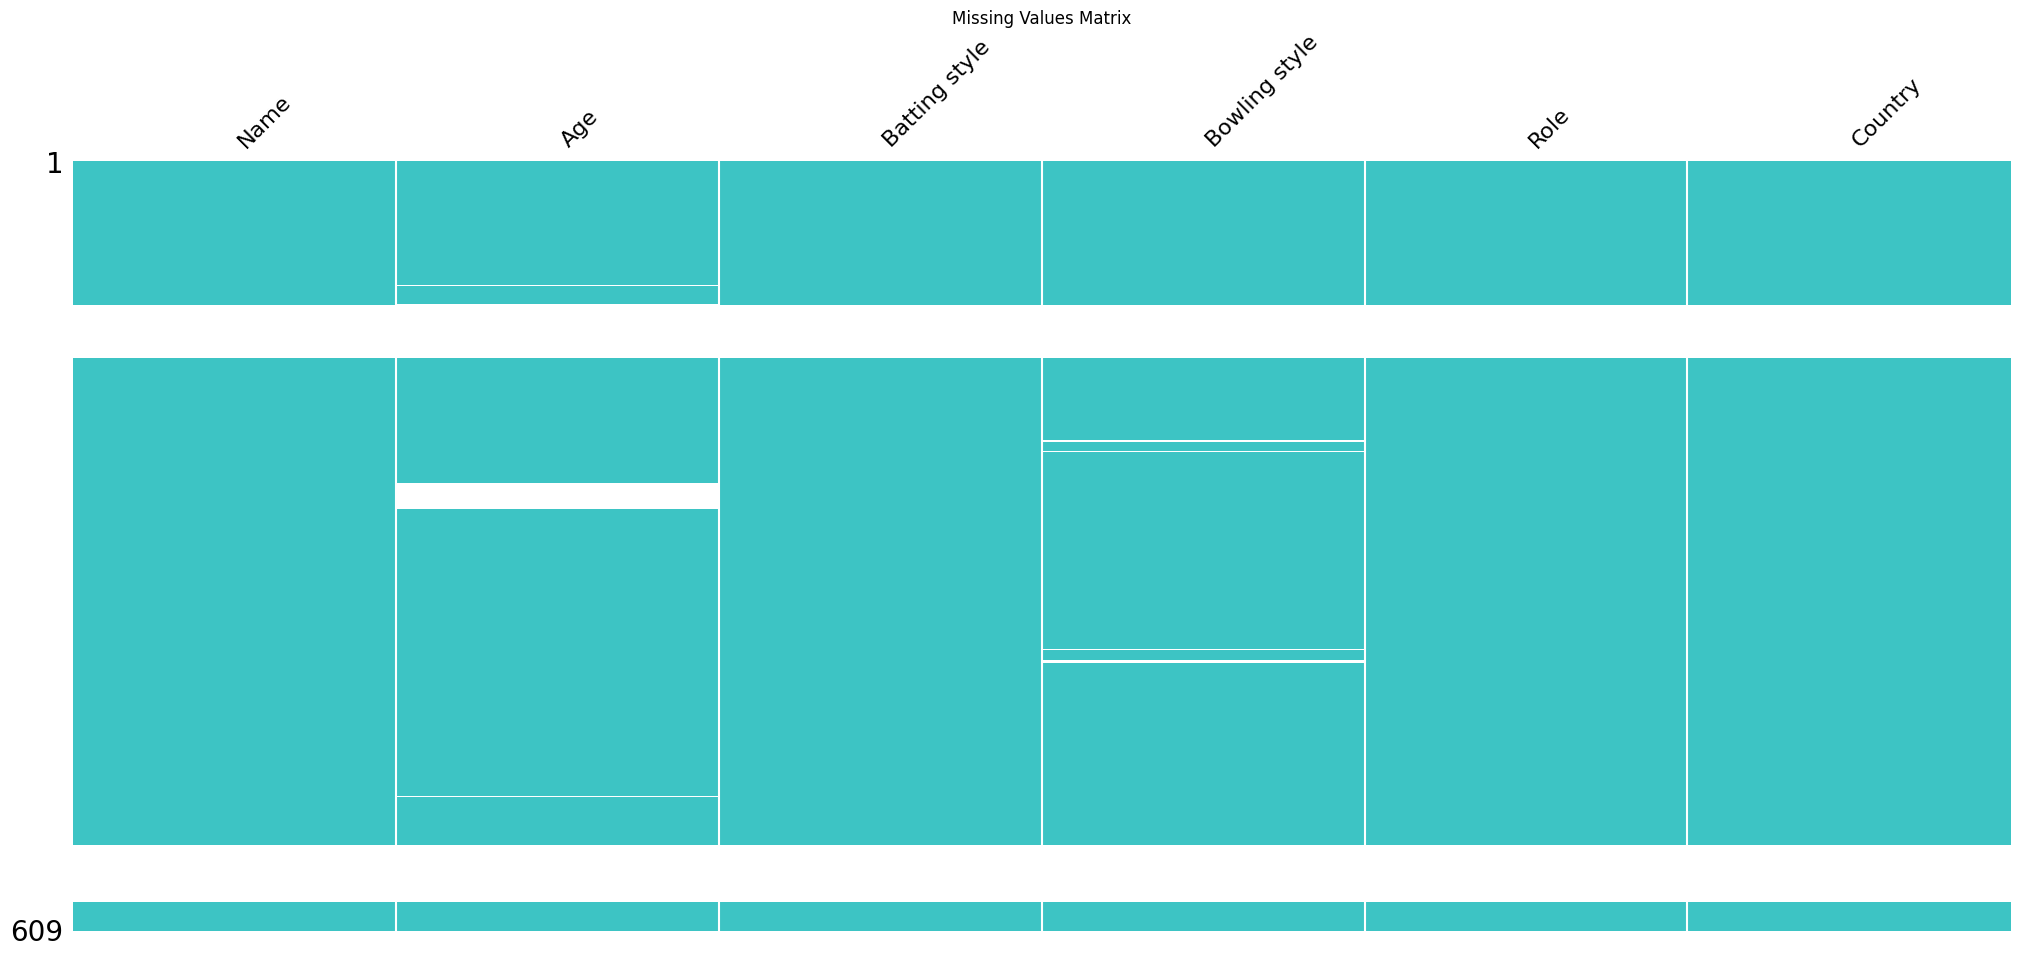

In [313]:
missing_values_matrix = all_squad.isnull()
plt.figure(figsize=(10, 6))
msno.matrix(all_squad, sparkline=False, color=(0.24, 0.77, 0.77))
plt.title('Missing Values Matrix')
plt.show()


In [ ]:
all_squad.to_csv('all_squad.csv')